In [1]:
#I501 Group 1 Cumulative Code

In [2]:
#Data Cleaning

In [3]:
import pandas as pd
import MySQLdb
myvars = {}
#CHANGE jartwest TO YOUR IU USERNAME
with open("jartwest-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()
myvars.keys()
conn = MySQLdb.connect(host="localhost", user = myvars['DB username'], passwd = myvars['DB password'], db = "I501Fa21grp01_db")
cursor = conn.cursor()
cursor.execute("SELECT DISTINCT(ResidenceCity), ResidenceCounty FROM KaggleDrugDeaths")
CorrectResidence = cursor.fetchall()

In [4]:
conn = MySQLdb.connect(host="localhost", user = myvars['DB username'], passwd = myvars['DB password'], db = "I501Fa21grp01_db")
cursor = conn.cursor()
cursor.execute("SELECT DISTINCT(DeathCity), DeathCounty FROM KaggleDrugDeaths")
CorrectDeath = cursor.fetchall()

In [5]:
#Generates SQL commands that we used in phpMyAdmin to clean empty values in KaggleDrugDeaths (specifically creates dataframe to be used in code that generates SQL)
#Done as part of data cleaning
CityToCountyR = []
for i in CorrectResidence:
    if i[1] != '':
        CityToCountyR.append(i)
CityCountyR = pd.DataFrame(CityToCountyR, columns = ["ResidenceCity", "ResidenceCounty"])

CityToCountyD = []
for i in CorrectDeath:
    if i[1] != '':
        CityToCountyD.append(i)
CityCountyD = pd.DataFrame(CityToCountyD, columns = ["DeathCity", "DeathCounty"])

In [6]:
#Generates SQL commands that we used in phpMyAdmin to clean empty values in KaggleDrugDeaths
#additional cleaning was required, such as large quantity of Hartford records which had a county of 'USA'
#many residence counties are from out of state

for i in CityToCountyR:
    query = "UPDATE KaggleDrugDeaths SET ResidenceCounty = '"+i[1]+"' WHERE ResidenceCity = '"+i[0]+"';"
    print(query)
for i in CityToCountyD:
    query = "UPDATE KaggleDrugDeaths SET DeathCounty = '"+i[1]+"' WHERE DeathCity = '"+i[0]+"';"
    print(query)
print('---')
for i in CityToCountyD:
    query = "UPDATE KaggleDrugDeaths SET ResidenceCounty = '"+i[1]+"' WHERE ResidenceCity = '"+i[0]+"';"
    print(query)
#SELECT COUNT(*) FROM `KaggleDrugDeaths` WHERE `ResidenceCounty` NOT IN ('HARTFORD', 'FAIRFIELD', 'NEW HAVEN', 'LITCHFIELD', 'NEW LONDON', 'TOLLAND','WINDHAM', 'MIDDLESEX', 'SUFFOLK', 'WESTCHESTER')


UPDATE KaggleDrugDeaths SET ResidenceCounty = 'FAIRFIELD' WHERE ResidenceCity = 'NORWALK';
UPDATE KaggleDrugDeaths SET ResidenceCounty = 'FAIRFIELD' WHERE ResidenceCity = 'SANDY HOOK';
UPDATE KaggleDrugDeaths SET ResidenceCounty = 'WESTCHESTER' WHERE ResidenceCity = 'RYE';
UPDATE KaggleDrugDeaths SET ResidenceCounty = 'QUEENS' WHERE ResidenceCity = 'FLUSHING';
UPDATE KaggleDrugDeaths SET ResidenceCounty = 'HARTFORD' WHERE ResidenceCity = 'BRISTOL';
UPDATE KaggleDrugDeaths SET ResidenceCounty = 'HARTFORD' WHERE ResidenceCity = 'WEST HARTFORD';
UPDATE KaggleDrugDeaths SET ResidenceCounty = 'NEW HAVEN' WHERE ResidenceCity = 'HAMDEN';
UPDATE KaggleDrugDeaths SET ResidenceCounty = 'HARTFORD' WHERE ResidenceCity = 'EAST HARTFORD';
UPDATE KaggleDrugDeaths SET ResidenceCounty = 'NEW LONDON' WHERE ResidenceCity = 'MONTVILLE';
UPDATE KaggleDrugDeaths SET ResidenceCounty = 'FAIRFIELD' WHERE ResidenceCity = 'DANBURY';
UPDATE KaggleDrugDeaths SET ResidenceCounty = 'NEW HAVEN' WHERE ResidenceCity = 

In [7]:
#Descriptive Statistics

In [8]:
#Housing Data

In [9]:
conn = MySQLdb.connect(host="localhost", user = myvars['DB username'], passwd = myvars['DB password'], db = "I501Fa21grp01_db")
cursor = conn.cursor()
cursor.execute("SELECT * FROM HousingData")
rows = cursor.fetchall()

In [10]:
Housing = pd.DataFrame(rows, columns = ['Town', 'County', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as stats
%matplotlib inline

In [12]:
Housing = Housing.drop(labels=0, axis=0)

In [13]:
Housing.head()

Town      County  2012  2013  2014  2015  2016  2017  2018
1      Andover     Tolland  1322  1326  1328  1332  1335  1338  1343
2      Ansonia   New Haven  8154  8157  8154  8154  8151  8155  8159
3      Ashford     Windham  1910  1911  1914  1915  1920  1923  1925
4         Avon    Hartford  7445  7480  7498  7525  7541  7554  7558
5  Barkhamsted  Litchfield  1592  1593  1599  1600  1600  1600  1601

In [14]:
Housing.mean()

<ipython-input-14-9bf71afd9eaa>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Housing.mean()


2012    8838.047337
2013    8861.875740
2014    8886.071006
2015    8914.751479
2016    8940.360947
2017    8958.964497
2018    8980.207101
dtype: float64

In [15]:
Housing.median()

<ipython-input-15-088e7d5ec8b4>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Housing.median()


2012    5467.0
2013    5477.0
2014    5491.0
2015    5497.0
2016    5506.0
2017    5629.0
2018    5618.0
dtype: float64

In [16]:
Housing.var()

<ipython-input-16-1dd3f531293e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Housing.var()


2012    1.103892e+08
2013    1.109410e+08
2014    1.116164e+08
2015    1.124501e+08
2016    1.130602e+08
2017    1.131290e+08
2018    1.134170e+08
dtype: float64

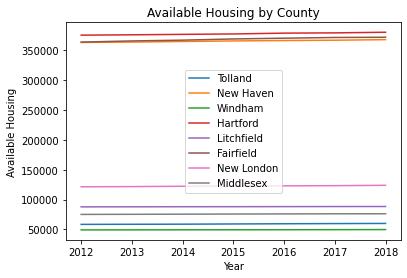

In [86]:
yearsHousing = ['2012', '2013', '2014', '2015', '2016', '2017', '2018']
countyHousing = []
Counties = ['Tolland', 'New Haven', 'Windham', 'Hartford', 'Litchfield', 'Fairfield', 'New London', 'Middlesex']
for i in Counties:
    countyData = {}
    CountyHousing = Housing[Housing['County']==i]
    plotLine = []
    for j in yearsHousing:
        CountyYear = CountyHousing[j].sum()
        plotLine.append(CountyYear)    
    plt.plot(yearsHousing, plotLine, label = i)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Available Housing')
plt.title('Available Housing by County')
plt.show()

In [18]:
#Income Data

In [19]:
!pip install --user mysqlclient

In [20]:
#loads data and generates lists organizing the values by year and statistic

myvars = {}
with open("jartwest-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()
myvars.keys()

import MySQLdb
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db='I501Fa21grp01_db')
cursor = conn.cursor()
cursor.execute('select * from IncomeData');
rows = cursor.fetchall()

IncomeData = pd.DataFrame(rows, columns = ['Towns', 'Median household income', 'Mean household income', 'Per capita income', 'YEAR'])

towns = []
median_household_income = []
mean_household_income = []
per_capita_income = []

for i in range(0,len(rows)):
    towns.append(rows[i][0])
    median_household_income.append(rows[i][1])
    mean_household_income.append(rows[i][2])
    per_capita_income.append(rows[i][3])

median_h_i_2012 = []
mean_h_i_2012 = []
per_capita_i_2012 = []

median_h_i_2013 = []
mean_h_i_2013 = []
per_capita_i_2013 = []

median_h_i_2014 = []
mean_h_i_2014 = []
per_capita_i_2014 = []

median_h_i_2015 = []
mean_h_i_2015 = []
per_capita_i_2015 = []

cursor2 = conn.cursor()
cursor2.execute('select * from IncomeData where YEAR = 2012');
rows_2012 = cursor2.fetchall()

for i in range(0,len(rows_2012)):
    median_h_i_2012.append(rows_2012[i][1])
    mean_h_i_2012.append(rows_2012[i][2])
    per_capita_i_2012.append(rows_2012[i][3])
    
cursor3 = conn.cursor()
cursor3.execute('select * from IncomeData where YEAR = 2013');
rows_2013 = cursor3.fetchall()

for i in range(0,len(rows_2013)):
    median_h_i_2013.append(rows_2013[i][1])
    mean_h_i_2013.append(rows_2013[i][2])
    per_capita_i_2013.append(rows_2013[i][3])
    
cursor4 = conn.cursor()
cursor4.execute('select * from IncomeData where YEAR = 2014');
rows_2014 = cursor4.fetchall()

for i in range(0,len(rows_2014)):
    median_h_i_2014.append(rows_2014[i][1])
    mean_h_i_2014.append(rows_2014[i][2])
    per_capita_i_2014.append(rows_2014[i][3])

cursor5 = conn.cursor()
cursor5.execute('select * from IncomeData where YEAR = 2015');
rows_2015 = cursor5.fetchall()

for i in range(0,len(rows_2015)):
    median_h_i_2015.append(rows_2015[i][1])
    mean_h_i_2015.append(rows_2015[i][2])
    per_capita_i_2015.append(rows_2015[i][3])


In [21]:
#prints mean of each attribute by year
import numpy as np

print("Per capita income mean in 2012:", np.mean(per_capita_i_2012), " 2013:", np.mean(per_capita_i_2013), " 2014:", np.mean(per_capita_i_2014), " 2015:", np.mean(per_capita_i_2015))
print("Median Household Income mean in 2012:", np.mean(median_h_i_2012), " 2013:", np.mean(median_h_i_2013), " 2014:", np.mean(median_h_i_2014), " 2015:", np.mean(median_h_i_2015))
#print("Mean Household Income mean in 2012:", np.mean(mean_h_i_2012), " 2013:", np.mean(mean_h_i_2013), " 2014:", np.mean(mean_h_i_2014), " 2015:", np.mean(mean_h_i_2015))

Per capita income mean in 2012: 41094.81065088757  2013: 41074.54437869822  2014: 41602.83431952663  2015: 42047.79881656805
Median Household Income mean in 2012: 83851.21301775148  2013: 83899.05917159763  2014: 84381.92899408285  2015: 85095.44378698224


In [22]:
#prints median of each attribute by year
print("Per capita income median 2012:", np.median(per_capita_i_2012), " 2013:", np.median(per_capita_i_2013), " 2014:", np.median(per_capita_i_2014), " 2015:", np.median(per_capita_i_2015))
print("Median Household income median 2012:", np.median(median_h_i_2012), " 2013:", np.median(median_h_i_2013), " 2014:", np.median(median_h_i_2014), " 2015:", np.median(median_h_i_2015))

Per capita income median 2012: 39095.0  2013: 38738.0  2014: 39246.0  2015: 39877.0
Median Household income median 2012: 80655.0  2013: 80160.0  2014: 80850.0  2015: 81650.0


In [23]:
#prints standard deviation of each attribute by year
print("Per capita income standard deviation 2012:", np.std(per_capita_i_2012), "2013:", np.std(per_capita_i_2013), "2014:", np.std(per_capita_i_2014), "2015:",np.std(per_capita_i_2015))
print("median household income standard deviation 2012:", np.std(median_h_i_2012), "2013:", np.std(median_h_i_2013), "2014:", np.std(median_h_i_2014), "2015:",np.std(median_h_i_2015))

Per capita income standard deviation 2012: 13872.820109785407 2013: 13713.263074174638 2014: 13911.557922055454 2015: 14266.291755208582
median household income standard deviation 2012: 26558.42738740194 2013: 26766.071904404744 2014: 26665.428895784546 2015: 27109.46307886519


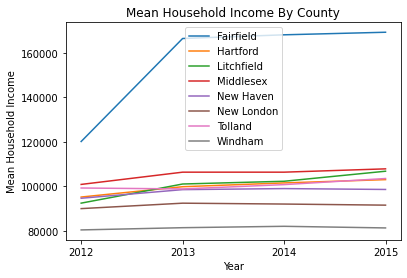

In [24]:
import MySQLdb
import numpy as np
import matplotlib.pyplot as plt

years = [2012,2013,2014,2015]
myvars = {}
with open("jartwest-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()
myvars.keys()


conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db='I501Fa21grp01_db')
cursor = conn.cursor()
cursor.execute('SELECT AVG(IncomeData.`Mean household income`), HousingData.County, IncomeData.YEAR FROM `IncomeData` JOIN `HousingData` ON IncomeData.Towns = HousingData.Town GROUP BY IncomeData.YEAR, HousingData.County');
rows = cursor.fetchall()

counties = []
mean_household_income_per_county_2012 = []
mean_household_income_per_county_2013 = []


for i in range(0,8):    
    counties.append(rows[i][1])

fairfield = []
hartford = []
litchfield = []
middlesex = []
newhaven = []
newlondon = []
tolland = []
windham = []
    
for i in range(0, len(rows)):
    if rows[i][1] == 'Fairfield':
        fairfield.append(rows[i][0])
    if rows[i][1] == 'Hartford':
        hartford.append(rows[i][0])
    if rows[i][1] == 'Litchfield':
        litchfield.append(rows[i][0])
    if rows[i][1] == 'Middlesex':
        middlesex.append(rows[i][0])
    if rows[i][1] == 'New Haven':
        newhaven.append(rows[i][0])
    if rows[i][1] == 'New London':
        newlondon.append(rows[i][0])
    if rows[i][1] == 'Tolland':
        tolland.append(rows[i][0])
    if rows[i][1] == 'Windham':
        windham.append(rows[i][0])
    
plt.plot(years, fairfield, label = 'Fairfield')
plt.xticks(years)
plt.plot(years,hartford, label = 'Hartford')
plt.plot(years,litchfield, label = 'Litchfield')
plt.plot(years,middlesex, label = 'Middlesex')
plt.plot(years, newhaven, label = 'New Haven')
plt.plot(years, newlondon, label = 'New London')
plt.plot(years, tolland, label = 'Tolland')
plt.plot(years, windham, label = 'Windham')
plt.xlabel('Year')
plt.ylabel('Mean Household Income')
plt.title('Mean Household Income By County')
plt.legend()
plt.show()

In [25]:
#Demographic Data

In [26]:
import pandas as pd
myvars = {}
with open("jartwest-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()
myvars.keys()

conn = MySQLdb.connect(host="localhost", user = myvars['DB username'], passwd = myvars['DB password'], db = "I501Fa21grp01_db")
cursor = conn.cursor()
cursor.execute("SELECT * FROM DemographicData")
DemographicData = cursor.fetchall()
DemographicDF = pd.DataFrame(DemographicData, columns = ['County', 'Age Group', 'NonHispanicWhiteM', 'NonHispanicWhiteF', 'NonHispanicBlackM', 'NonHispanicBlackF', 'NonHispanicAmerIndianM', 'NonHispanicAmerIndianF', 'NonHispanicAsianPiM', 'NonHispanicAsianPiF', 'NonHispanicTotal', 'HispanicWhiteM', 'HispanicWhiteF', 'HispanicBlackM', 'HispanicBlackF', 'HispanicAmerIndianM', 'HispanicAmerIndianF', 'HispanicAsianPiM', 'HispanicAsianPiF', 'HispanicTotal', 'Total', 'Year'])

In [27]:
DemographicDF.describe()

NonHispanicWhiteM  NonHispanicWhiteF  NonHispanicBlackM  \
count        1064.000000        1064.000000        1064.000000   
mean         7947.671053        8369.452068        1189.025376   
std          6591.254422        6812.353626        1565.213333   
min           411.000000         388.000000           2.000000   
25%          3074.250000        3124.500000         108.000000   
50%          5333.500000        5437.000000         305.000000   
75%         13151.750000       13941.000000        2145.750000   
max         27098.000000       28022.000000        5384.000000   

       NonHispanicBlackF  NonHispanicAmerIndianM  NonHispanicAmerIndianF  \
count        1064.000000             1064.000000             1064.000000   
mean         1295.594925               30.598684               31.449248   
std          1668.551462               29.580568               29.056685   
min             4.000000                0.000000                0.000000   
25%            94.750000                9.000000                9.000000   
50%           313.000000               17.000000               18.000000   
75%          2670.250000               51.000000               55.000000   
max          5057.000000              169.000000              163.000000   

       NonHispanicAsianPiM  NonHispanicAsianPiF  NonHispanicTotal  \
count          1064.000000          1064.000000       1064.000000   
mean            533.355263           572.366541      19969.513158   
std             666.555677           707.816118      17432.916836   
min               1.000000             1.000000        864.000000   
25%              75.750000            90.000000       6929.750000   
50%             198.500000           209.000000      11934.500000   
75%             796.750000           836.000000      36391.000000   
max            3009.000000          2870.000000      65546.000000   

       HispanicWhiteM  HispanicWhiteF  HispanicBlackM  HispanicBlackF  \
count     1064.000000     1064.000000     1064.000000     1064.000000   
mean      1528.986842     1523.248120      212.107143      229.531015   
std       2103.575064     2018.177839      319.510588      334.388912   
min          6.000000        6.000000        0.000000        0.000000   
25%        177.000000      178.750000       17.000000       19.000000   
50%        404.500000      422.000000       51.000000       53.000000   
75%       1855.750000     2212.750000      237.750000      247.000000   
max       7020.000000     6924.000000     1379.000000     1287.000000   

       HispanicAmerIndianM  HispanicAmerIndianF  HispanicAsianPiM  \
count          1064.000000          1064.000000       1064.000000   
mean             44.121241            41.074248         28.394737   
std              60.253239            53.253129         39.122648   
min               0.000000             0.000000          0.000000   
25%               4.000000             4.000000          3.000000   
50%              13.000000            12.000000         10.000000   
75%              63.250000            58.250000         36.500000   
max             250.000000           202.000000        223.000000   

       HispanicAsianPiF  HispanicTotal         Total         Year  
count       1064.000000    1064.000000   1064.000000  1064.000000  
mean          23.860902    3631.324248  23600.837406  2015.000000  
std           31.279028    4910.808058  21705.176212     2.000941  
min            0.000000      13.000000   1067.000000  2012.000000  
25%            3.000000     444.000000   7761.750000  2013.000000  
50%            8.000000     957.000000  12416.500000  2015.000000  
75%           28.000000    4553.500000  43580.750000  2017.000000  
max          134.000000   16137.000000  75954.000000  2018.000000

In [28]:
Counties = DemographicDF["County"].unique()
Ages = DemographicDF["Age Group"].unique()
Years = [2012, 2013, 2014, 2015, 2016, 2017, 2018]

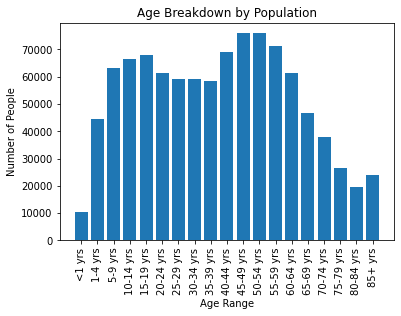

In [29]:
#Displays average ages in dataset
plt.bar(DemographicDF['Age Group'], DemographicDF['Total'])
plt.title('Age Breakdown by Population')
plt.xticks(rotation = 90)
plt.xlabel("Age Range")
plt.ylabel("Number of People")
plt.show()

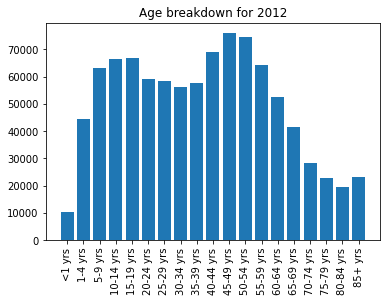

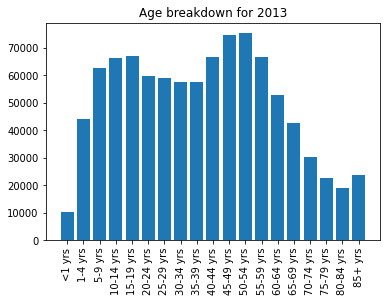

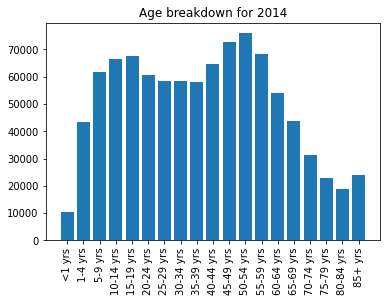

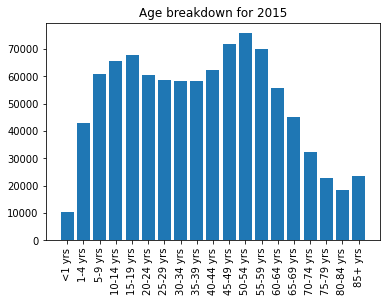

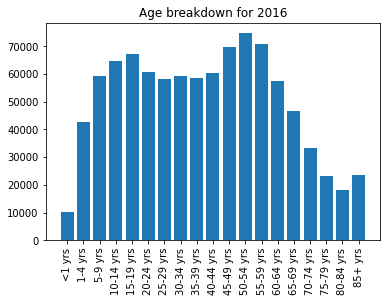

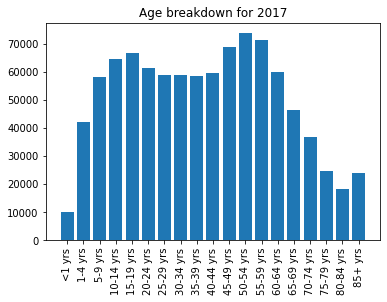

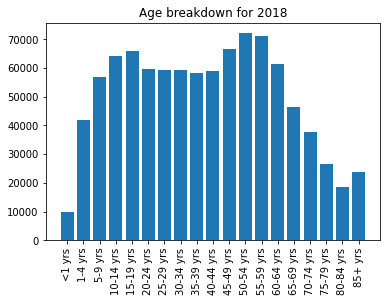

In [30]:
#Displays breakdown of ages overtime
def AgeBreakDown(DF):
    for i in Years:
        TimeDF = DF[DF['Year']==i]
        plt.bar(TimeDF['Age Group'], TimeDF['Total'])
        plt.title('Age breakdown for '+str(i))
        plt.xticks(rotation = 90)
        plt.show()
AgeBreakDown(DemographicDF)

Fairfield


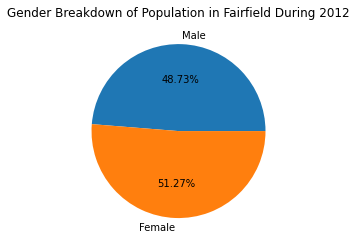

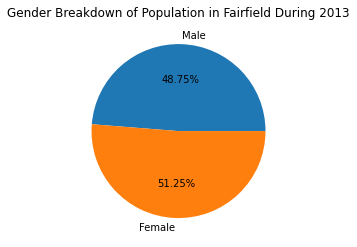

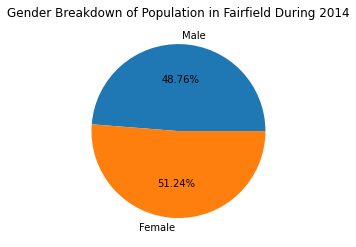

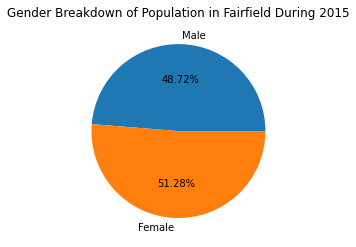

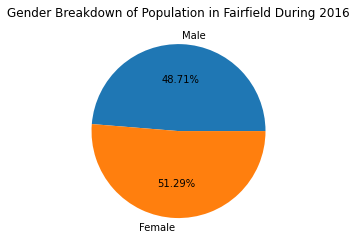

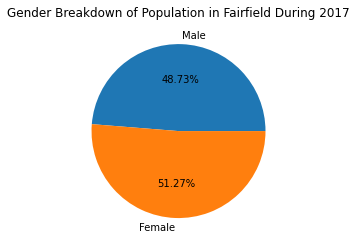

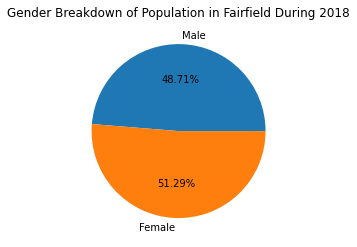

Hartford


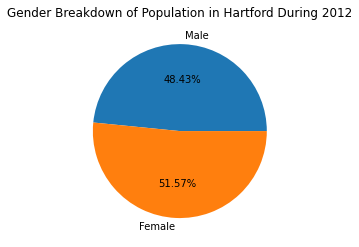

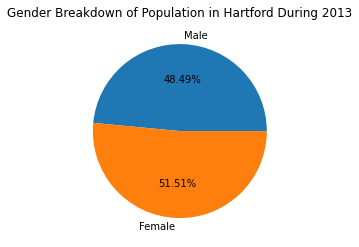

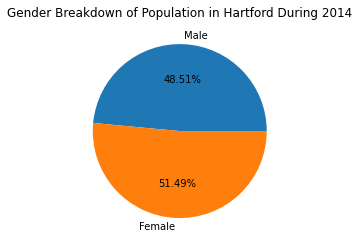

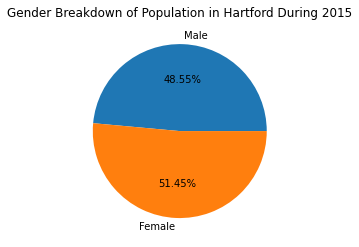

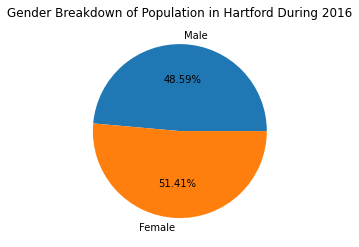

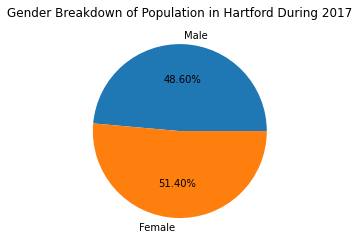

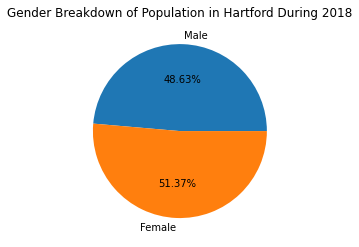

Litchfield


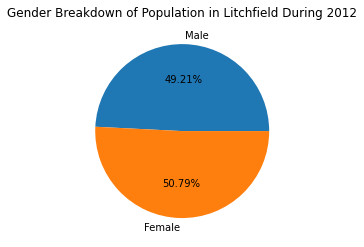

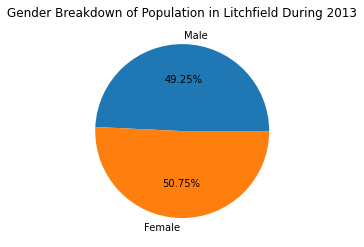

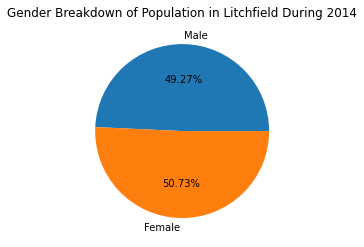

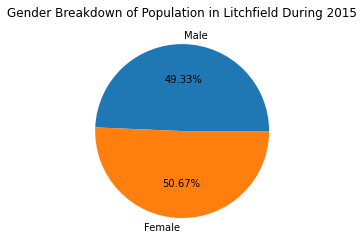

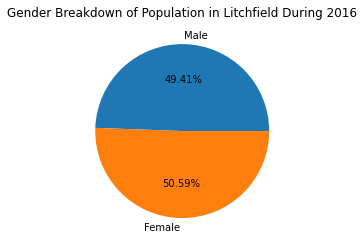

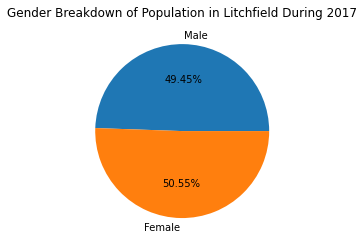

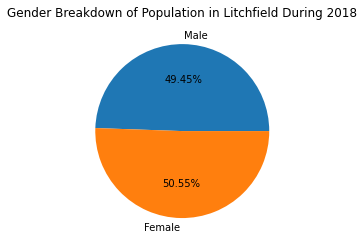

Middlesex


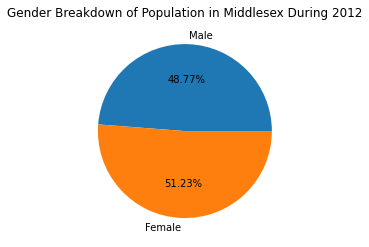

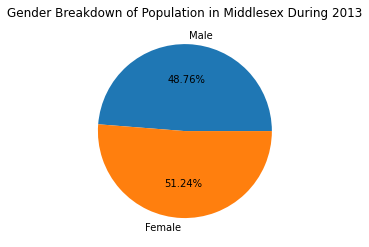

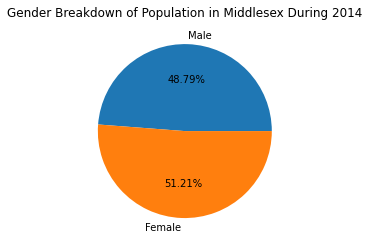

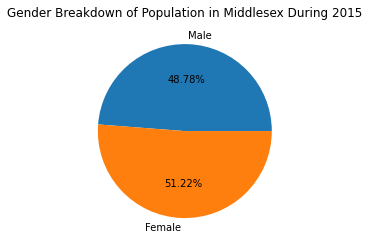

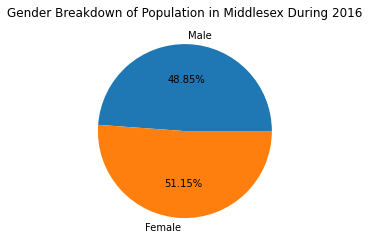

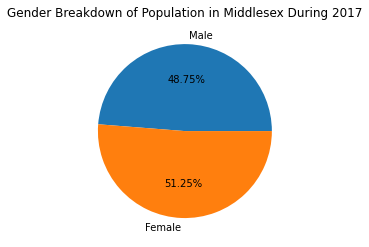

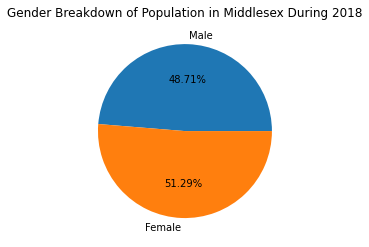

New Haven


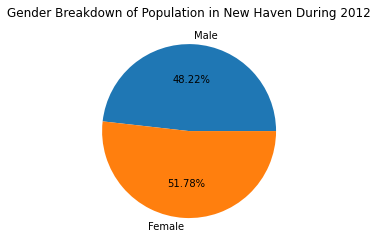

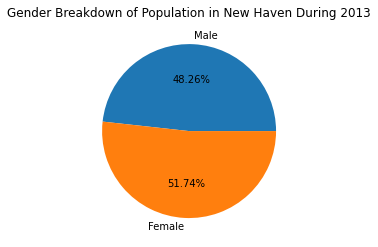

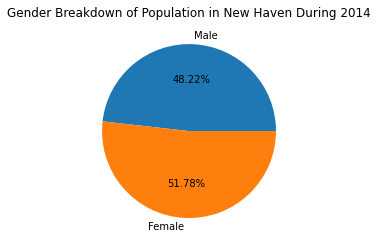

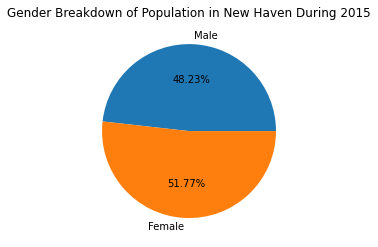

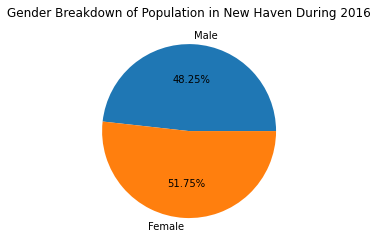

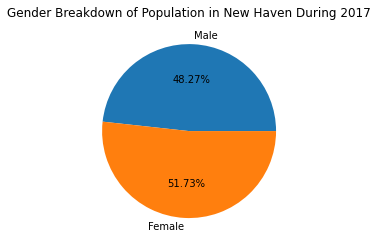

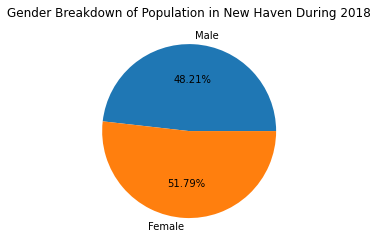

New London


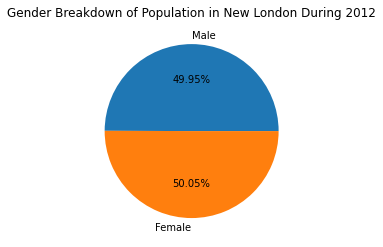

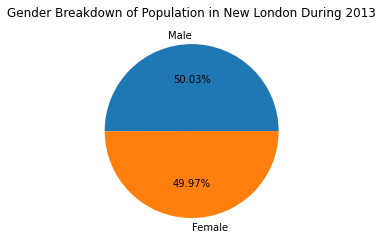

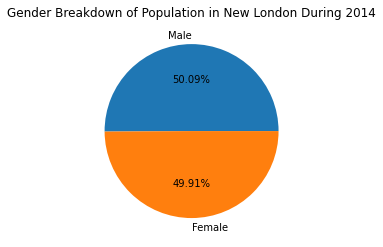

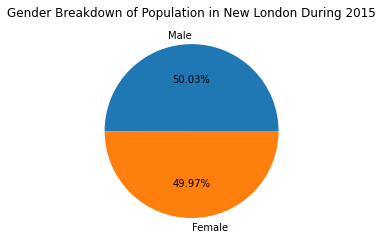

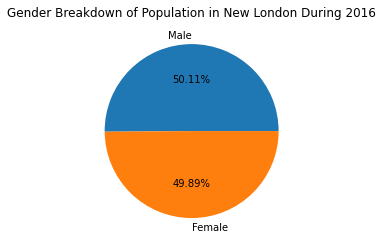

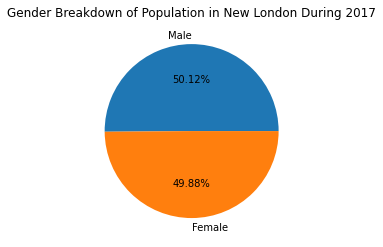

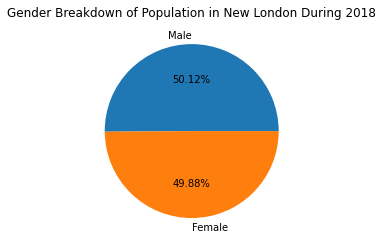

Tolland


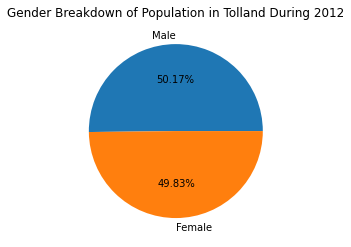

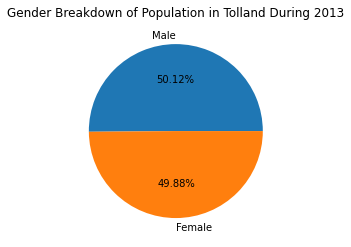

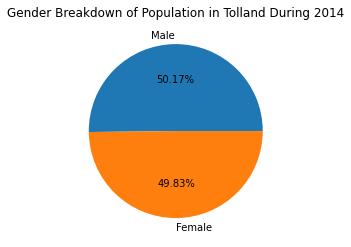

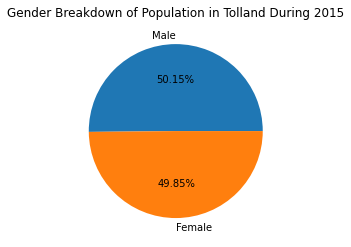

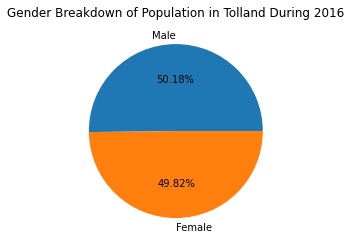

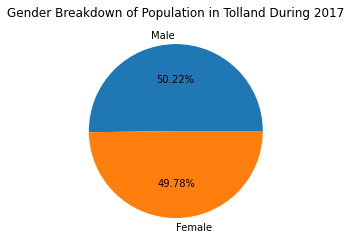

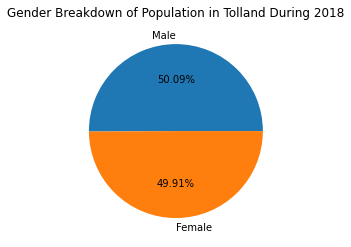

Windham


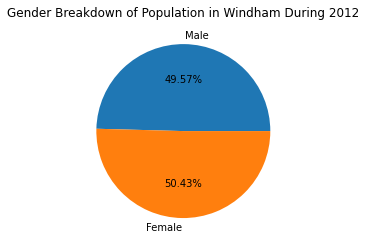

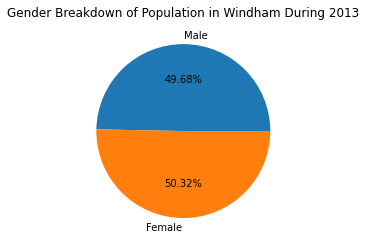

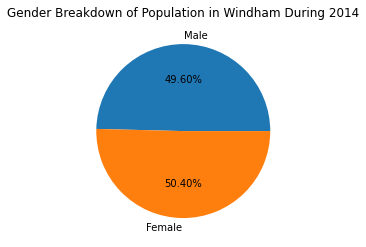

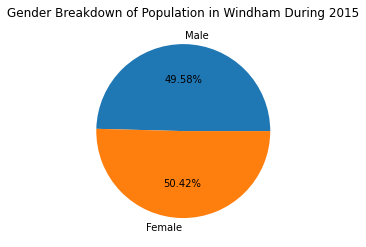

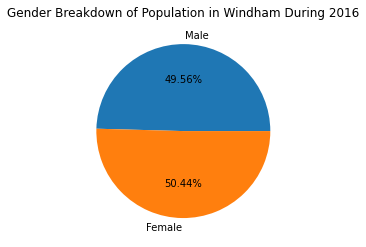

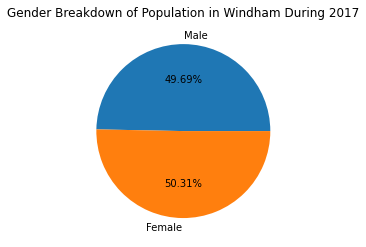

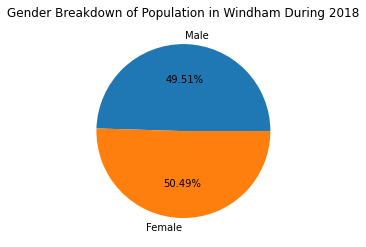

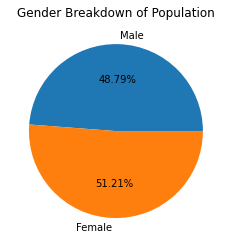

In [31]:
#Presents all visualiations for each year and for each county
def AllGenderPercentage(DF):
    for i in Counties:
        print(i)
        for j in Years:
            TimeDF = DF[DF['Year']==j]
            TimePlaceDF = TimeDF[TimeDF['County']==i]
            
            pieVal = []
            pieValTitles = ["Male", "Female"]
            pieVal.append(TimePlaceDF["NonHispanicWhiteM"].sum() + TimePlaceDF["NonHispanicBlackM"].sum() + TimePlaceDF["NonHispanicAmerIndianM"].sum() + TimePlaceDF["NonHispanicAsianPiM"].sum() + TimePlaceDF["HispanicWhiteM"].sum() + TimePlaceDF["HispanicBlackM"].sum() + TimePlaceDF["HispanicAmerIndianM"].sum() + TimePlaceDF["HispanicAsianPiM"].sum())
            pieVal.append(TimePlaceDF["NonHispanicWhiteF"].sum() + TimePlaceDF["NonHispanicBlackF"].sum() + TimePlaceDF["NonHispanicAmerIndianF"].sum() + TimePlaceDF["NonHispanicAsianPiF"].sum() + TimePlaceDF["HispanicWhiteF"].sum() + TimePlaceDF["HispanicBlackF"].sum() + TimePlaceDF["HispanicAmerIndianF"].sum() + TimePlaceDF["HispanicAsianPiF"].sum())
            
            plt.figure()
            plt.pie(pieVal, labels = pieValTitles, autopct="%.2f%%")
            plotTitle = 'Gender Breakdown of Population in '+i+' During '+str(j)
            plt.title(plotTitle)
            plt.show()
            
    pieVal = []
    pieValTitles = ["Male", "Female"]
    pieVal.append(DF["NonHispanicWhiteM"].sum() + DF["NonHispanicBlackM"].sum() + DF["NonHispanicAmerIndianM"].sum() + DF["NonHispanicAsianPiM"].sum() + DF["HispanicWhiteM"].sum() + DF["HispanicBlackM"].sum() + DF["HispanicAmerIndianM"].sum() + DF["HispanicAsianPiM"].sum())
    pieVal.append(DF["NonHispanicWhiteF"].sum() + DF["NonHispanicBlackF"].sum() + DF["NonHispanicAmerIndianF"].sum() + DF["NonHispanicAsianPiF"].sum() + DF["HispanicWhiteF"].sum() + DF["HispanicBlackF"].sum() + DF["HispanicAmerIndianF"].sum() + DF["HispanicAsianPiF"].sum())
    plt.figure()
    plt.pie(pieVal, labels = pieValTitles, autopct="%.2f%%")
    plotTitle = 'Gender Breakdown of Population'
    plt.title(plotTitle)
    plt.show()
AllGenderPercentage(DemographicDF)

Fairfield


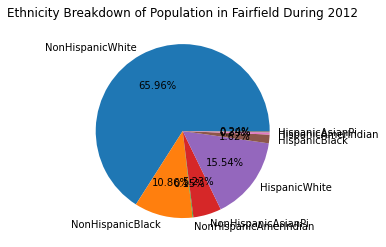

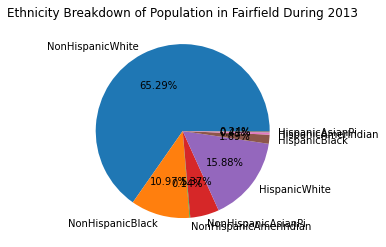

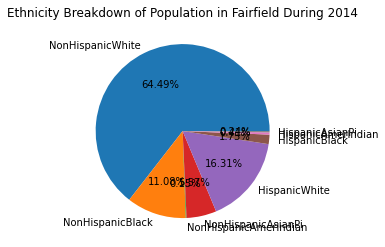

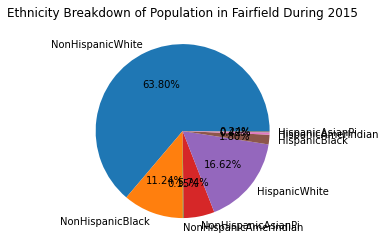

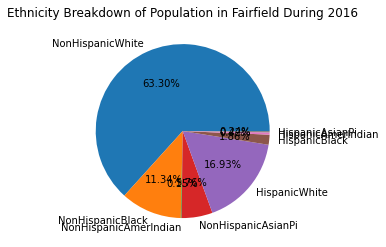

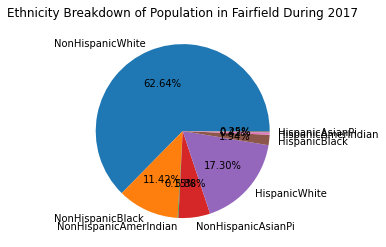

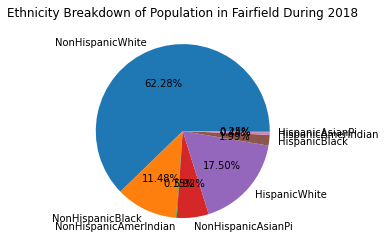

Hartford


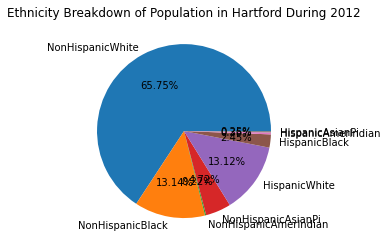

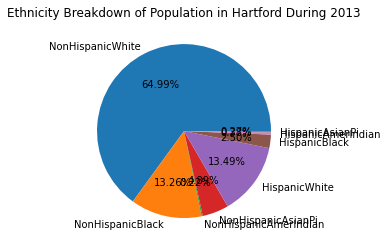

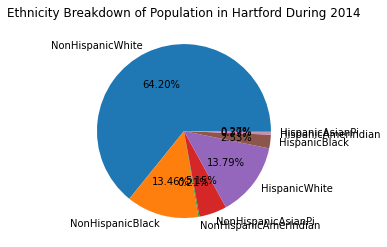

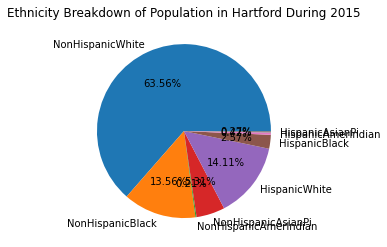

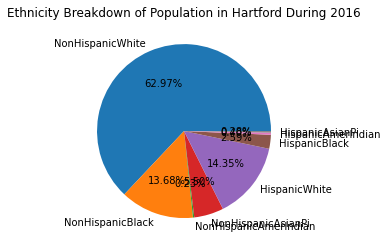

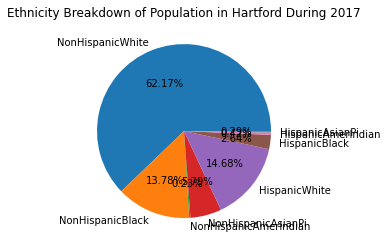

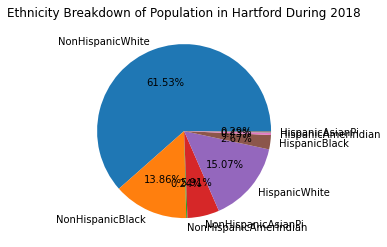

Litchfield


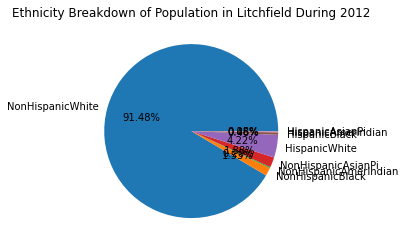

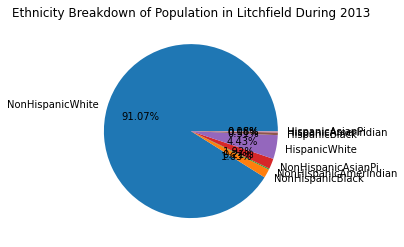

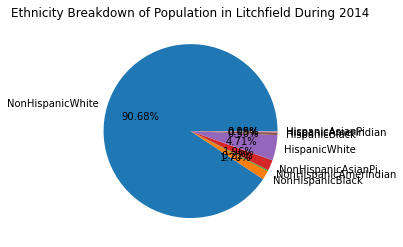

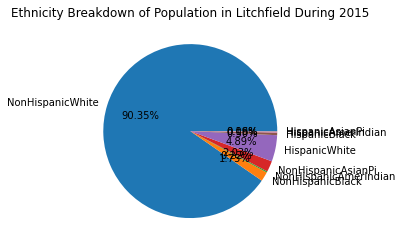

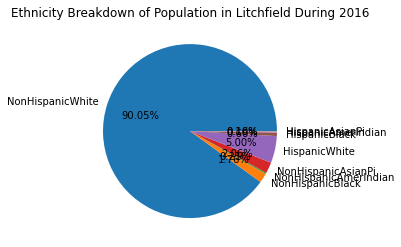

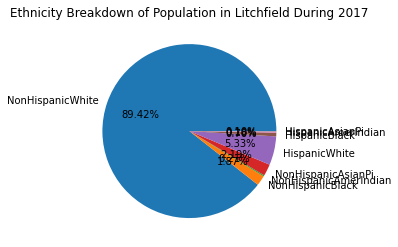

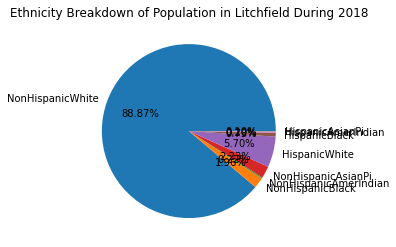

Middlesex


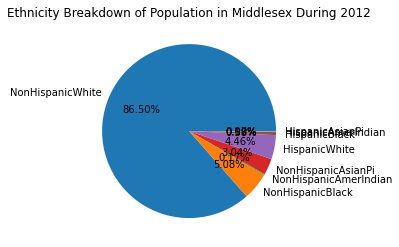

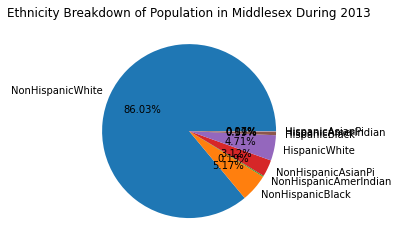

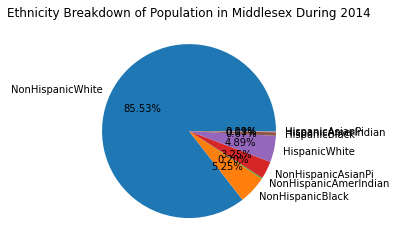

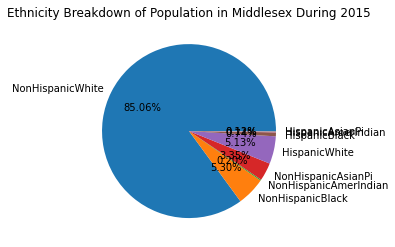

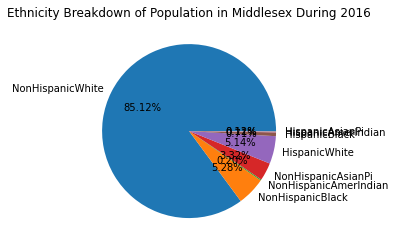

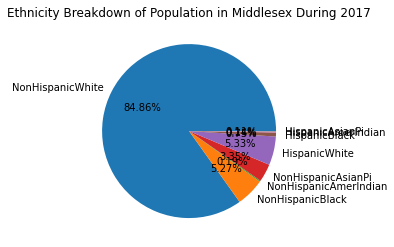

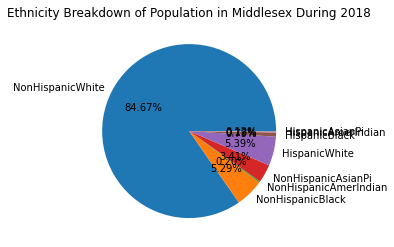

New Haven


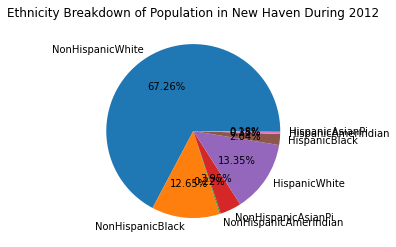

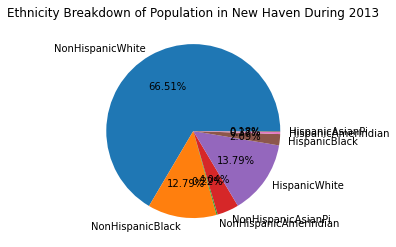

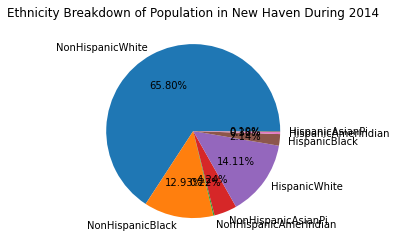

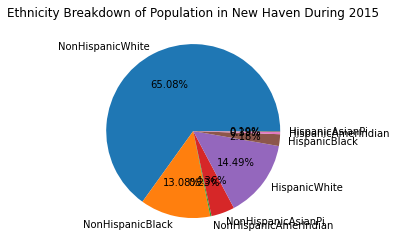

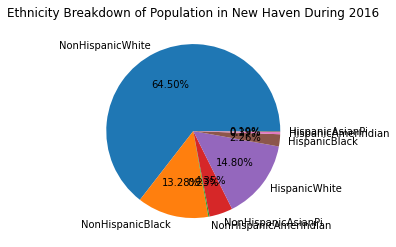

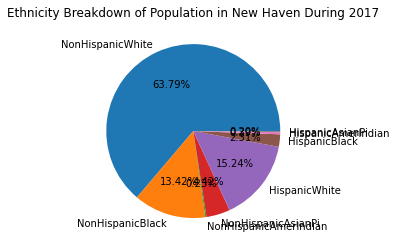

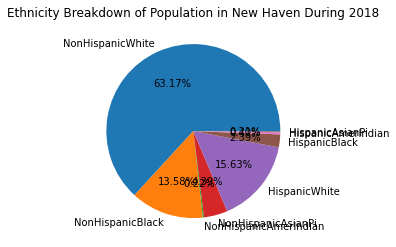

New London


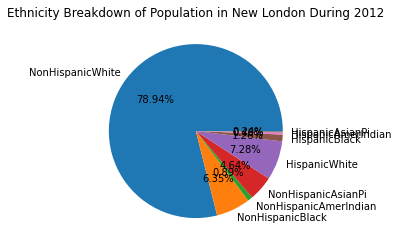

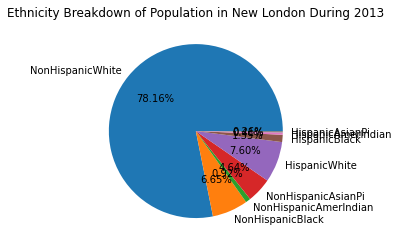

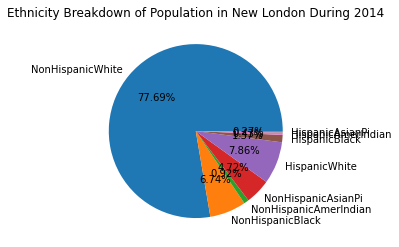

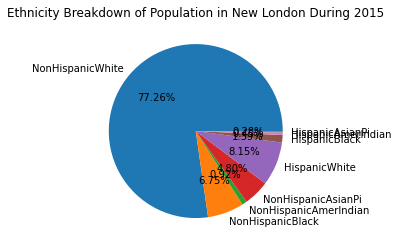

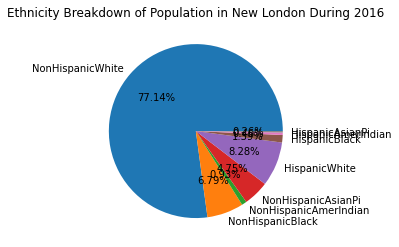

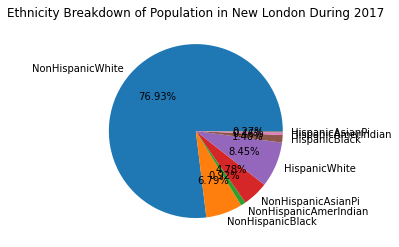

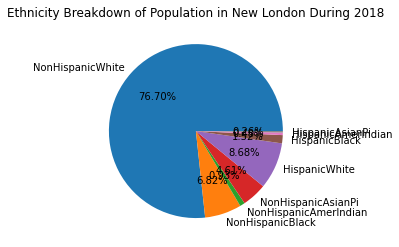

Tolland


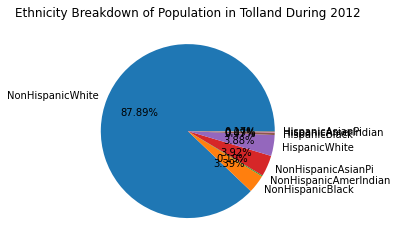

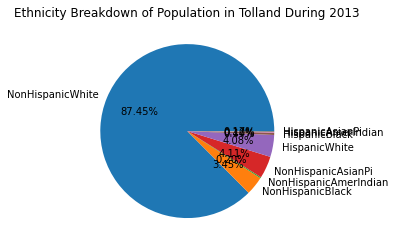

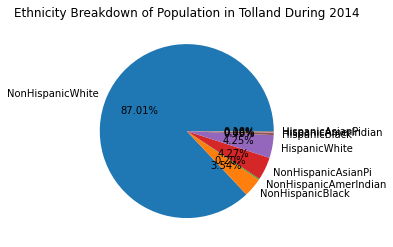

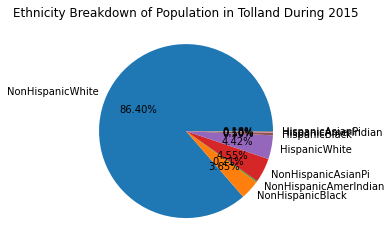

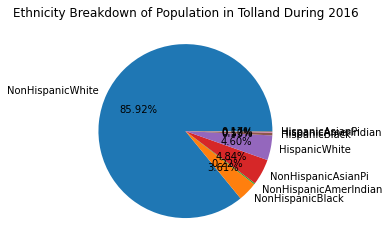

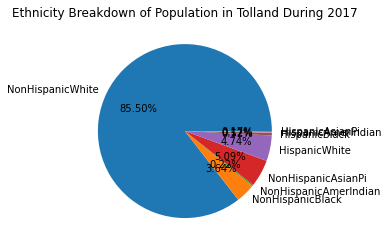

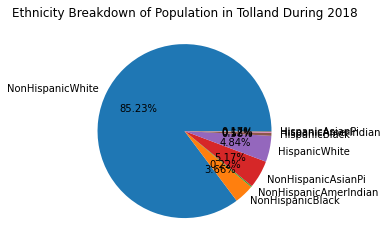

Windham


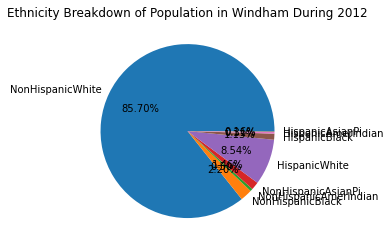

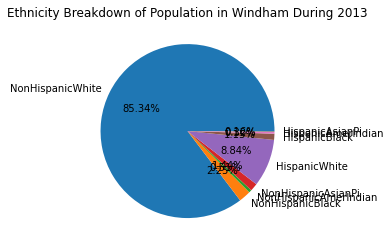

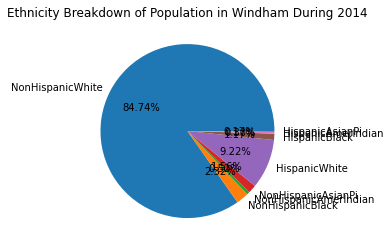

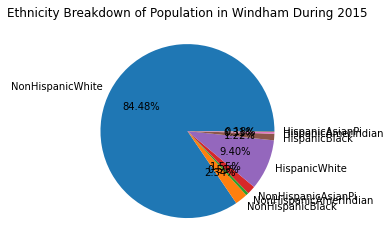

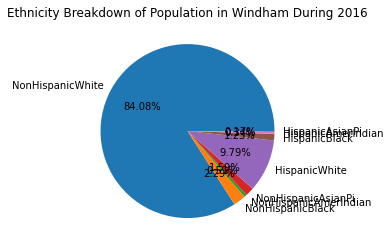

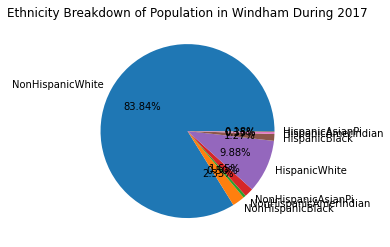

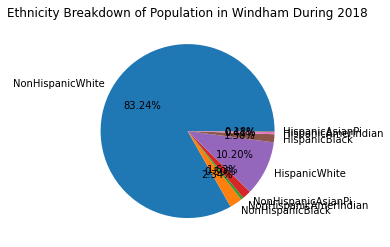

In [32]:
#Presents all visualiations for each year and for each county
def AllCountyPercentage(DF):
    for i in Counties:
        print(i)
        for j in Years:
            TimeDF = DF[DF['Year']==j]
            TimePlaceDF = TimeDF[TimeDF['County']==i]
            
            pieVal = []
            pieValTitles = ["NonHispanicWhite", "NonHispanicBlack", "NonHispanicAmerIndian", "NonHispanicAsianPi", "HispanicWhite", "HispanicBlack", "HispanicAmerIndian", "HispanicAsianPi"]
            pieVal.append(TimePlaceDF["NonHispanicWhiteM"].sum() + TimePlaceDF["NonHispanicWhiteF"].sum())
            pieVal.append(TimePlaceDF["NonHispanicBlackM"].sum() + TimePlaceDF["NonHispanicBlackF"].sum())
            pieVal.append(TimePlaceDF["NonHispanicAmerIndianM"].sum() + TimePlaceDF["NonHispanicAmerIndianF"].sum())
            pieVal.append(TimePlaceDF["NonHispanicAsianPiM"].sum() + TimePlaceDF["NonHispanicAsianPiF"].sum())
            pieVal.append(TimePlaceDF["HispanicWhiteM"].sum() + TimePlaceDF["HispanicWhiteF"].sum())
            pieVal.append(TimePlaceDF["HispanicBlackM"].sum() + TimePlaceDF["HispanicBlackF"].sum())
            pieVal.append(TimePlaceDF["HispanicAmerIndianM"].sum() + TimePlaceDF["HispanicAmerIndianF"].sum())
            pieVal.append(TimePlaceDF["HispanicAsianPiM"].sum() + TimePlaceDF["HispanicAsianPiF"].sum())
            
            plt.figure()
            plt.pie(pieVal, labels = pieValTitles, autopct="%.2f%%")
            plotTitle = 'Ethnicity Breakdown of Population in '+i+' During '+str(j)
            plt.title(plotTitle)
            plt.show()

AllCountyPercentage(DemographicDF)

Fairfield


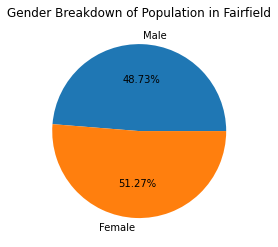

Hartford


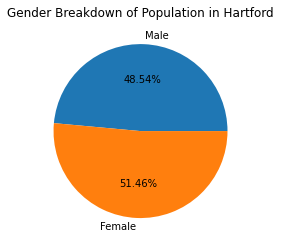

Litchfield


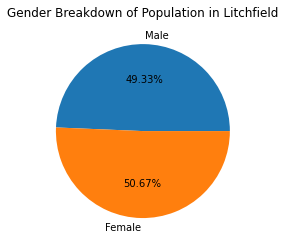

Middlesex


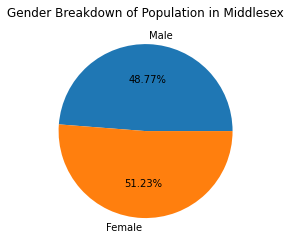

New Haven


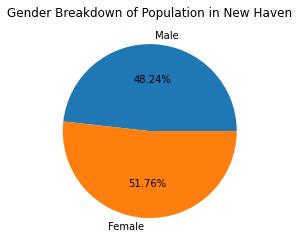

New London


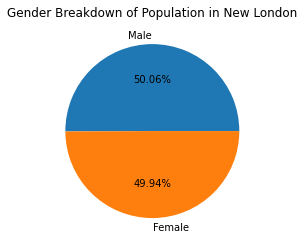

Tolland


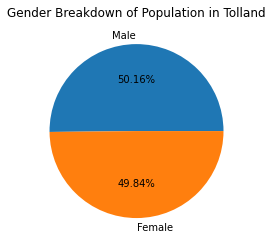

Windham


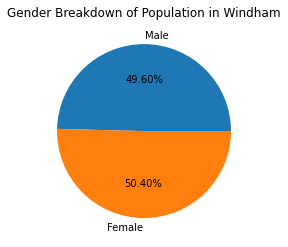

In [33]:
#Presents visualiations for each county based on the average score overall across the years
#created so data can be more easily consumed
def GeneralGenderPercentage(DF):
    for i in Counties:
        print(i)
        Male = 0
        Female = 0
        for j in Years:
            TimeDF = DF[DF['Year']==j]
            TimePlaceDF = TimeDF[TimeDF['County']==i]
            
            Male += TimePlaceDF["NonHispanicWhiteM"].sum() + TimePlaceDF["NonHispanicBlackM"].sum() + TimePlaceDF["NonHispanicAmerIndianM"].sum() + TimePlaceDF["NonHispanicAsianPiM"].sum() + TimePlaceDF["HispanicWhiteM"].sum() + TimePlaceDF["HispanicBlackM"].sum() + TimePlaceDF["HispanicAmerIndianM"].sum() + TimePlaceDF["HispanicAsianPiM"].sum()
            Female += TimePlaceDF["NonHispanicWhiteF"].sum() + TimePlaceDF["NonHispanicBlackF"].sum() + TimePlaceDF["NonHispanicAmerIndianF"].sum() + TimePlaceDF["NonHispanicAsianPiF"].sum() + TimePlaceDF["HispanicWhiteF"].sum() + TimePlaceDF["HispanicBlackF"].sum() + TimePlaceDF["HispanicAmerIndianF"].sum() + TimePlaceDF["HispanicAsianPiF"].sum()
        Male = Male/len(Years) 
        Female = Female/len(Years)
        pieVal = [Male, Female]
        pieValTitles = ["Male", "Female"]
        plt.figure()
        plt.pie(pieVal, labels = pieValTitles, autopct="%.2f%%")
        plotTitle = 'Gender Breakdown of Population in '+i
        plt.title(plotTitle)
        plt.show()
GeneralGenderPercentage(DemographicDF)

Fairfield


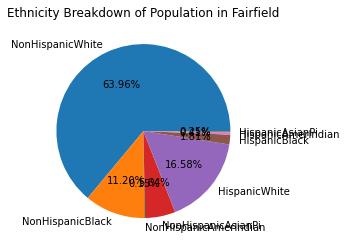

Hartford


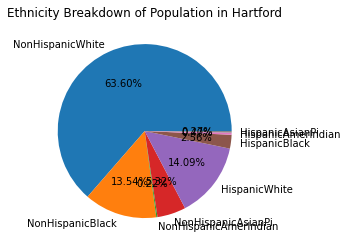

Litchfield


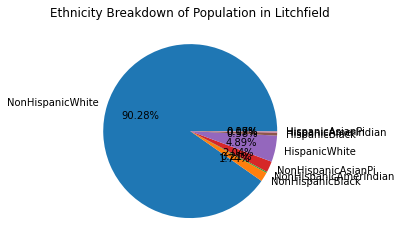

Middlesex


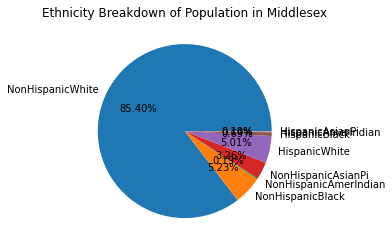

New Haven


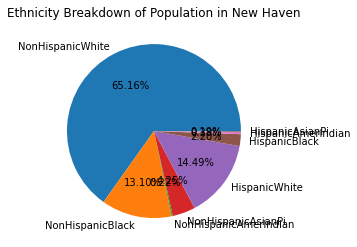

New London


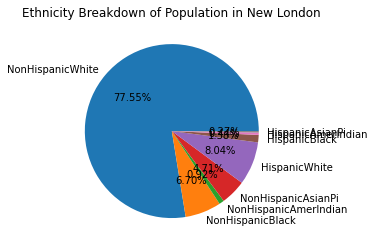

Tolland


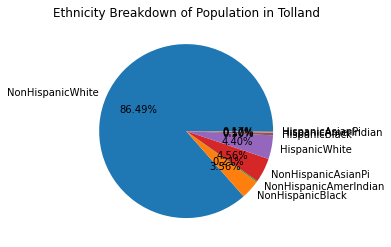

Windham


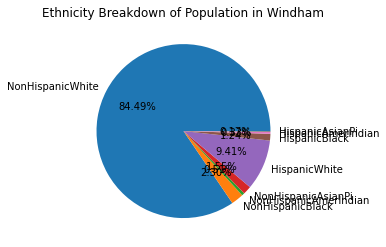

In [34]:
#Presents visualiations for each county based on the average score overall across the years
#created so data can be more easily consumed
def GeneralCountyPercentage(DF):
    for i in Counties:
        print(i)
        NonHispanicWhite = 0
        NonHispanicBlack = 0
        NonHispanicAmerIndian = 0
        NonHispanicAsianPi = 0
        HispanicWhite = 0
        HispanicBlack = 0
        HispanicAmerIndian = 0
        HispanicAsianPi = 0
        for j in Years:
            TimeDF = DF[DF['Year']==j]
            TimePlaceDF = TimeDF[TimeDF['County']==i]
            
            NonHispanicWhite += TimePlaceDF["NonHispanicWhiteM"].sum() + TimePlaceDF["NonHispanicWhiteF"].sum()
            NonHispanicBlack += TimePlaceDF["NonHispanicBlackM"].sum() + TimePlaceDF["NonHispanicBlackF"].sum()
            NonHispanicAmerIndian += TimePlaceDF["NonHispanicAmerIndianM"].sum() + TimePlaceDF["NonHispanicAmerIndianF"].sum()
            NonHispanicAsianPi += TimePlaceDF["NonHispanicAsianPiM"].sum() + TimePlaceDF["NonHispanicAsianPiF"].sum()
            HispanicWhite += TimePlaceDF["HispanicWhiteM"].sum() + TimePlaceDF["HispanicWhiteF"].sum()
            HispanicBlack += TimePlaceDF["HispanicBlackM"].sum() + TimePlaceDF["HispanicBlackF"].sum()
            HispanicAmerIndian += TimePlaceDF["HispanicAmerIndianM"].sum() + TimePlaceDF["HispanicAmerIndianF"].sum()
            HispanicAsianPi += TimePlaceDF["HispanicAsianPiM"].sum() + TimePlaceDF["HispanicAsianPiF"].sum()
            
        NonHispanicWhite = NonHispanicWhite/len(Years)
        NonHispanicBlack = NonHispanicBlack/len(Years)
        NonHispanicAmerIndian = NonHispanicAmerIndian/len(Years)
        NonHispanicAsianPi = NonHispanicAsianPi/len(Years)
        HispanicWhite = HispanicWhite/len(Years)
        HispanicBlack = HispanicBlack/len(Years)
        HispanicAmerIndian = HispanicAmerIndian/len(Years)
        HispanicAsianPi = HispanicAsianPi/len(Years)
        
        pieVal = [NonHispanicWhite, NonHispanicBlack, NonHispanicAmerIndian, NonHispanicAsianPi, HispanicWhite, HispanicBlack, HispanicAmerIndian, HispanicAsianPi]
        pieValTitles = ["NonHispanicWhite", "NonHispanicBlack", "NonHispanicAmerIndian", "NonHispanicAsianPi", "HispanicWhite", "HispanicBlack", "HispanicAmerIndian", "HispanicAsianPi"]
            
        plt.figure()
        plt.pie(pieVal, labels = pieValTitles, autopct="%.2f%%")
        plotTitle = 'Ethnicity Breakdown of Population in '+i
        plt.title(plotTitle)
        plt.show()

GeneralCountyPercentage(DemographicDF)

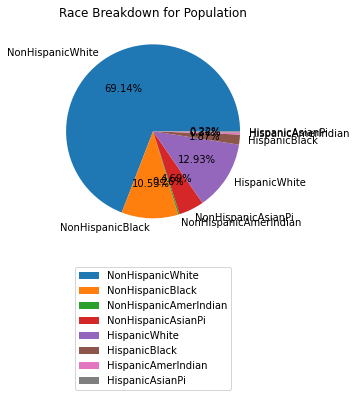

In [35]:
NonHispanicWhite = DemographicDF["NonHispanicWhiteM"].sum() + DemographicDF["NonHispanicWhiteF"].sum()
NonHispanicBlack = DemographicDF["NonHispanicBlackM"].sum() + DemographicDF["NonHispanicBlackF"].sum()
NonHispanicAmerIndian = DemographicDF["NonHispanicAmerIndianM"].sum() + DemographicDF["NonHispanicAmerIndianF"].sum()
NonHispanicAsianPi = DemographicDF["NonHispanicAsianPiM"].sum() + DemographicDF["NonHispanicAsianPiF"].sum()
HispanicWhite = DemographicDF["HispanicWhiteM"].sum() + DemographicDF["HispanicWhiteF"].sum()
HispanicBlack = DemographicDF["HispanicBlackM"].sum() + DemographicDF["HispanicBlackF"].sum()
HispanicAmerIndian = DemographicDF["HispanicAmerIndianM"].sum() + DemographicDF["HispanicAmerIndianF"].sum()
HispanicAsianPi = DemographicDF["HispanicAsianPiM"].sum() + DemographicDF["HispanicAsianPiF"].sum()

values = [NonHispanicWhite, NonHispanicBlack, NonHispanicAmerIndian, NonHispanicAsianPi, HispanicWhite, HispanicBlack, HispanicAmerIndian, HispanicAsianPi]
labels = ['NonHispanicWhite', 'NonHispanicBlack', 'NonHispanicAmerIndian', 'NonHispanicAsianPi', 'HispanicWhite', 'HispanicBlack', 'HispanicAmerIndian', 'HispanicAsianPi']
valLabel = {}
for i in range(len(values)):
    valLabel[labels[i]]=values[i]

plt.pie(values, labels = labels, autopct='%1.2f%%')
plt.title("Race Breakdown for Population")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.show()

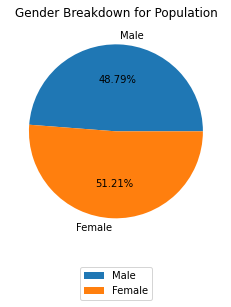

In [36]:
Male = DemographicDF["NonHispanicWhiteM"].sum() + DemographicDF["NonHispanicBlackM"].sum() + DemographicDF["NonHispanicAmerIndianM"].sum() + DemographicDF["NonHispanicAsianPiM"].sum() + DemographicDF["HispanicWhiteM"].sum() + DemographicDF["HispanicBlackM"].sum() + DemographicDF["HispanicAmerIndianM"].sum() + DemographicDF["HispanicAsianPiM"].sum()
Female = DemographicDF["NonHispanicWhiteF"].sum() + DemographicDF["NonHispanicBlackF"].sum() + DemographicDF["NonHispanicAmerIndianF"].sum() + DemographicDF["NonHispanicAsianPiF"].sum() + DemographicDF["HispanicWhiteF"].sum() + DemographicDF["HispanicBlackF"].sum() + DemographicDF["HispanicAmerIndianF"].sum() + DemographicDF["HispanicAsianPiF"].sum()

values = [Male, Female]
labels = ["Male", "Female"]

plt.pie(values, labels = labels, autopct='%1.2f%%')
plt.title("Gender Breakdown for Population")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.show()

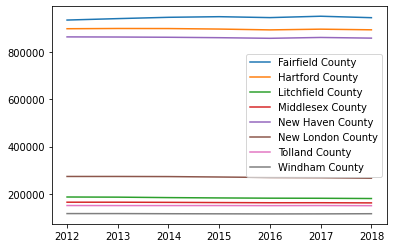

In [37]:
#plots the change in total population by county over time
def populationByCounty(DF):
    for i in Counties:
        annualTotal = []
        for j in Years:
            yearDf = DF[DF['Year']==j]
            CountyDF = yearDf[yearDf['County']==i]
            annualTotal.append(CountyDF['Total'].sum())
        plt.plot(Years, annualTotal, label = i+" County")
    plt.ticklabel_format(style='plain')
    plt.legend()
    plt.show()
populationByCounty(DemographicDF)

In [38]:
#Drug Overdose Data

In [39]:
myvars = {}
with open("jartwest-mysql-password") as myfile:
    for line in myfile:
        name,var =line.partition(":")[::2]
        myvars[name.strip()] = var.strip()
myvars.keys()

import MySQLdb
import pandas as pd
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db='I501Fa21grp01_db')
cursor = conn.cursor()
cursor.execute('SELECT * FROM KaggleDrugDeaths');
KaggleDataLoad = cursor.fetchall()
#print(KaggleDataLoad)

KaggleData = pd.DataFrame(KaggleDataLoad, columns = ['lumn1','ID','Date','DateType','Age','Sex','Race','ResidenceCity','ResidenceCounty','ResidenceState','DeathCity','DeathCounty','Location','LocationifOther','DescriptionofInjury','InjuryPlace','COD','OtherSignifican','Heroin','Cocaine','Fentanyl','Fentanyl_Analogue','Oxycodone','Oxymorphone','Ethanol','Hydrocodone','Benzodiazepine','Methadone','Amphet','Tramad','Morphine_NotHeroin','Hydromorphone','Other','OpiateNOS','AnyOpioid','MannerofDeath','DeathCityGeo','ResidenceCityGeo','InjuryCityGeo'])
KaggleData.drop(['Other', 'LocationifOther','OtherSignifican'], axis = 1, inplace = True)
KaggleData.describe()

lumn1     DateType          Age       Heroin      Cocaine  \
count  4916.000000  4916.000000  4916.000000  4916.000000  4916.000000   
mean   2559.037632     0.445077    41.979862     0.495321     0.291294   
std    1473.434090     0.497025    12.366718     0.500029     0.454405   
min       1.000000     0.000000    14.000000     0.000000     0.000000   
25%    1285.750000     0.000000    32.000000     0.000000     0.000000   
50%    2560.500000     0.000000    42.000000     0.000000     0.000000   
75%    3835.250000     1.000000    52.000000     1.000000     1.000000   
max    5104.000000     1.000000    87.000000     1.000000     1.000000   

          Fentanyl  Fentanyl_Analogue    Oxycodone  Oxymorphone      Ethanol  \
count  4916.000000        4916.000000  4916.000000  4916.000000  4916.000000   
mean      0.433889           0.074858     0.121237     0.021359     0.241863   
std       0.495661           0.263188     0.326435     0.144592     0.428255   
min       0.000000           0.000000     0.000000     0.000000     0.000000   
25%       0.000000           0.000000     0.000000     0.000000     0.000000   
50%       0.000000           0.000000     0.000000     0.000000     0.000000   
75%       1.000000           0.000000     0.000000     0.000000     0.000000   
max       1.000000           1.000000     1.000000     1.000000     1.000000   

       Hydrocodone  Benzodiazepine    Methadone       Amphet       Tramad  \
count  4916.000000     4916.000000  4916.000000  4916.000000  4916.000000   
mean      0.023393        0.264849     0.092758     0.031530     0.025834   
std       0.151164        0.441298     0.290123     0.174762     0.158656   
min       0.000000        0.000000     0.000000     0.000000     0.000000   
25%       0.000000        0.000000     0.000000     0.000000     0.000000   
50%       0.000000        0.000000     0.000000     0.000000     0.000000   
75%       0.000000        1.000000     0.000000     0.000000     0.000000   
max       1.000000        1.000000     1.000000     1.000000     1.000000   

       Hydromorphone    OpiateNOS  
count    4916.000000  4916.000000  
mean        0.004679     0.017494  
std         0.068247     0.131116  
min         0.000000     0.000000  
25%         0.000000     0.000000  
50%         0.000000     0.000000  
75%         0.000000     0.000000  
max         1.000000     1.000000

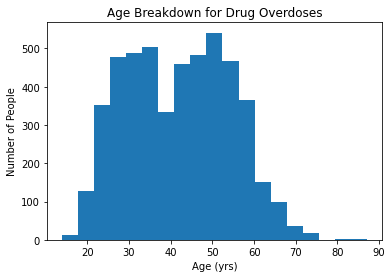

In [40]:
plt.hist(KaggleData['Age'], bins = 19)
plt.title("Age Breakdown for Drug Overdoses")
plt.xlabel("Age (yrs)")
plt.ylabel("Number of People")
plt.show()

Black 415
White 3889
Asian, Other 18
Hispanic, White 524
Asian Indian 14
Hispanic, Black 21
Unknown 21
Other 10
Chinese 2
Native American, Other 1
Hawaiian 1


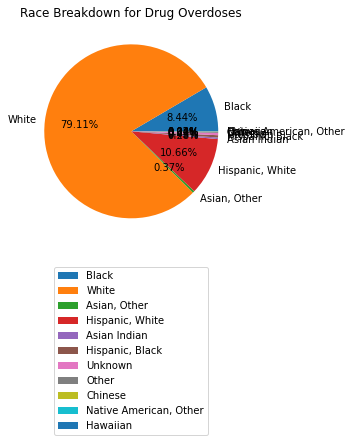

In [41]:
raceCountDict = {}
for i in KaggleData['Race'].unique():
    raceCountDict[i] = 0
    RaceDF = KaggleData[KaggleData['Race']==i]
    for j in RaceDF.iterrows():
        raceCountDict[i] += 1
    print(i, raceCountDict[i])
plt.pie(raceCountDict.values(), labels = raceCountDict.keys(), autopct='%1.2f%%')
plt.title("Race Breakdown for Drug Overdoses")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.show()

FAIRFIELD
Black 88
White 556
Asian, Other 3
Hispanic, White 98
Asian Indian 3
Hispanic, Black 5
Unknown 6
Other 3
Chinese 0
Native American, Other 0
Hawaiian 0


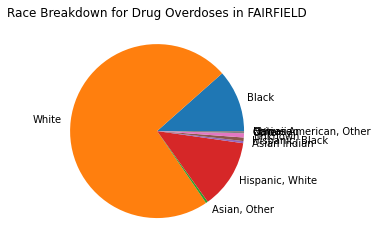

WESTCHESTER
Black 1
White 14
Asian, Other 0
Hispanic, White 2
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


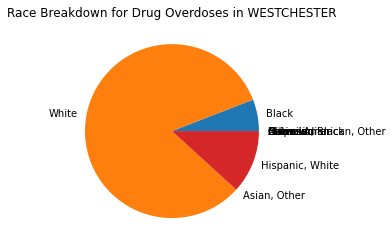

QUEENS
Black 0
White 2
Asian, Other 1
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


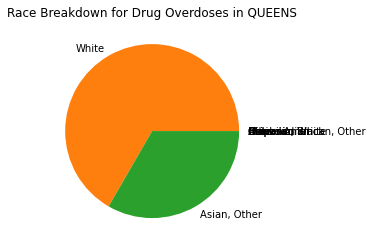

HARTFORD
Black 121
White 974
Asian, Other 6
Hispanic, White 230
Asian Indian 5
Hispanic, Black 8
Unknown 8
Other 4
Chinese 0
Native American, Other 0
Hawaiian 1


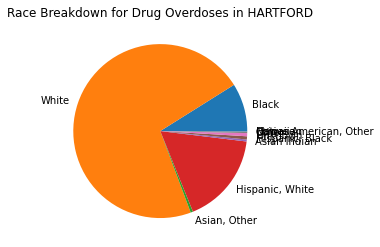

NEW HAVEN
Black 146
White 996
Asian, Other 5
Hispanic, White 125
Asian Indian 5
Hispanic, Black 4
Unknown 3
Other 2
Chinese 1
Native American, Other 0
Hawaiian 0


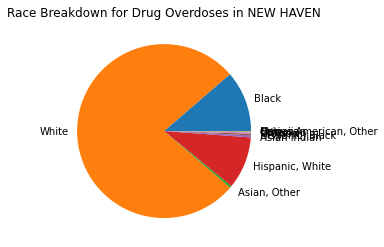

NEW LONDON
Black 29
White 401
Asian, Other 0
Hispanic, White 25
Asian Indian 1
Hispanic, Black 1
Unknown 2
Other 0
Chinese 1
Native American, Other 1
Hawaiian 0


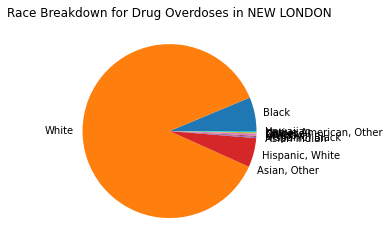

WINDHAM
Black 10
White 148
Asian, Other 0
Hispanic, White 17
Asian Indian 0
Hispanic, Black 1
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


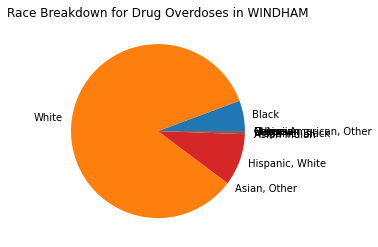

MIDDLESEX
Black 7
White 217
Asian, Other 1
Hispanic, White 10
Asian Indian 0
Hispanic, Black 0
Unknown 1
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


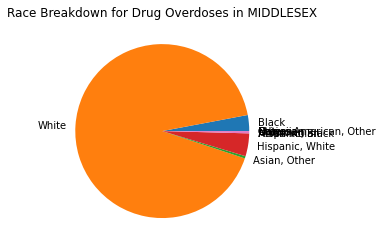

DAUPHIN
Black 0
White 0
Asian, Other 0
Hispanic, White 1
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


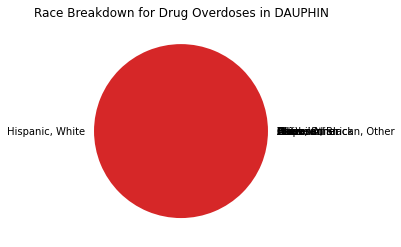

LITCHFIELD
Black 3
White 300
Asian, Other 1
Hispanic, White 5
Asian Indian 0
Hispanic, Black 0
Unknown 1
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


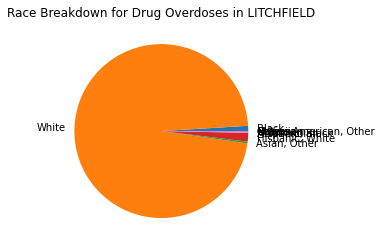

ESSEX
Black 2
White 4
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


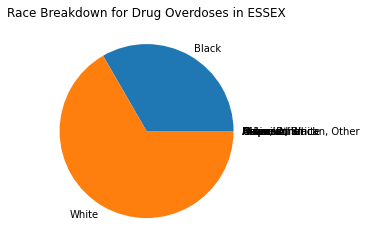

TOLLAND
Black 2
White 160
Asian, Other 0
Hispanic, White 2
Asian Indian 0
Hispanic, Black 1
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


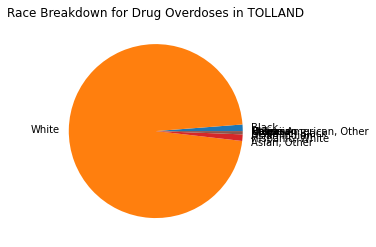

WINNEBAGO
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


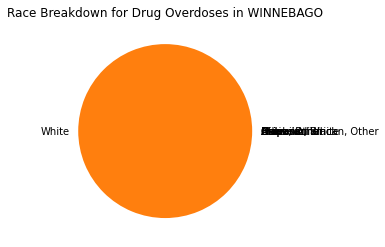

WORCESTER
Black 0
White 2
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


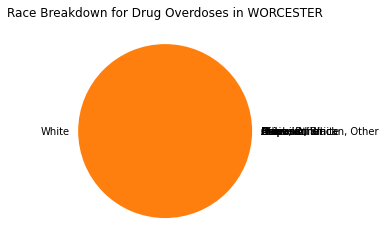

ULSTER
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


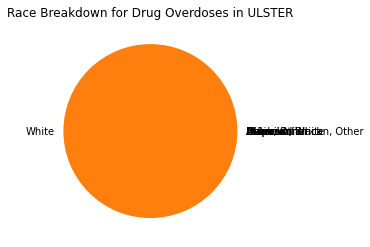

NEW YORK
Black 0
White 3
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


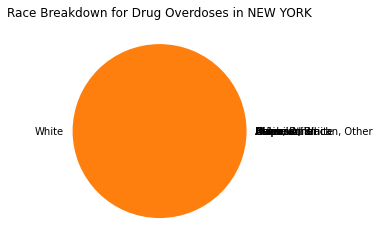

HAMPDEN
Black 1
White 6
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


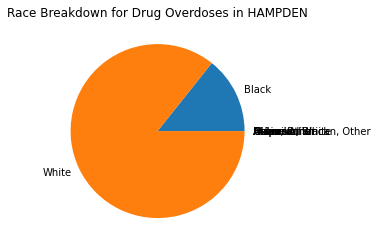


Black 0
White 29
Asian, Other 0
Hispanic, White 3
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


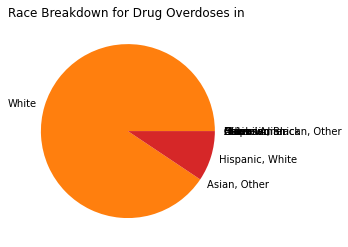

BROWARD
Black 1
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


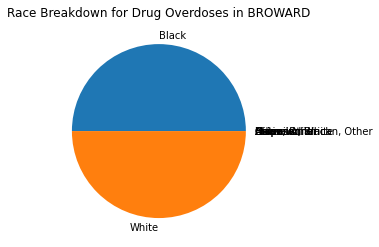

KNOX
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


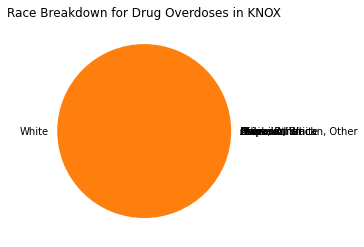

MUSCOGEE
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


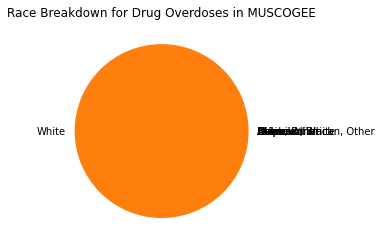

SUFFOLK
Black 1
White 3
Asian, Other 0
Hispanic, White 1
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


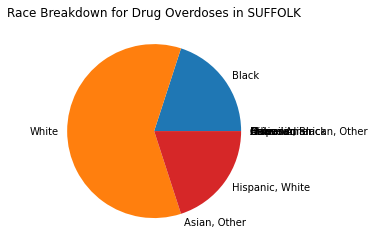

ORANGE
Black 0
White 3
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


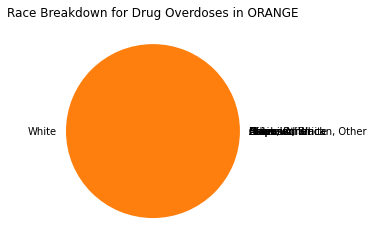

BRONX
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


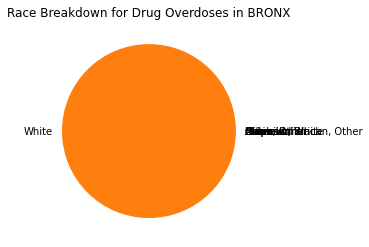

DUTCHESS
Black 0
White 8
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


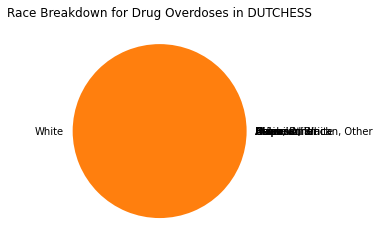

ROGERS
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


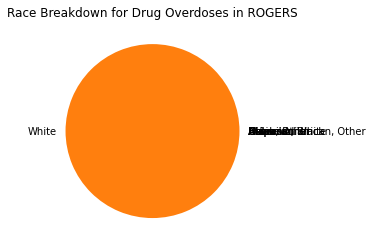

BENNINGTON
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


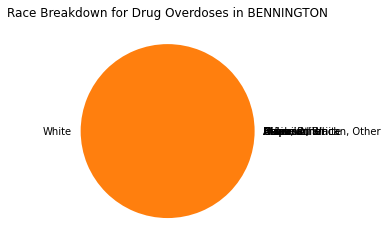

DELTA
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


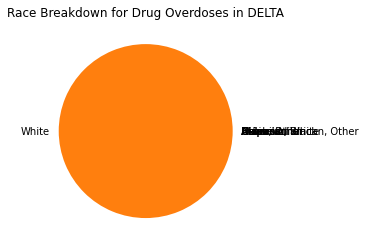

NORFOLK
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


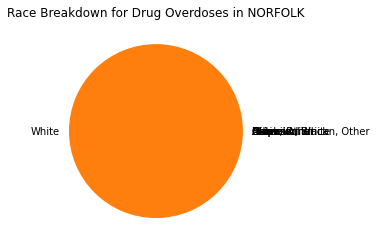

FRANKLIN
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


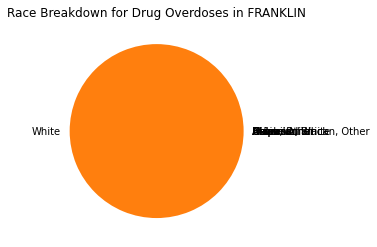

AROOSTOOK
Black 0
White 2
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


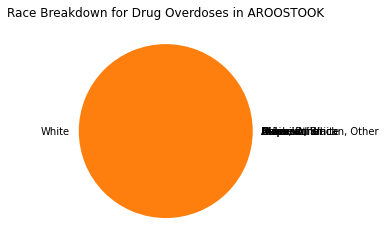

NASSAU
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 1
Chinese 0
Native American, Other 0
Hawaiian 0


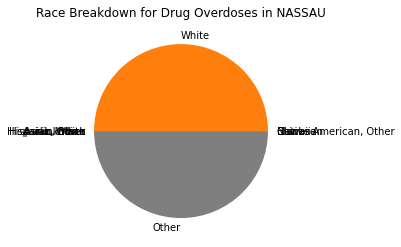

SULLIVAN
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


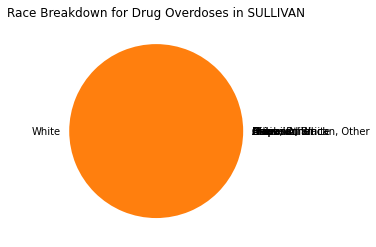

LOS ANGELES
Black 0
White 0
Asian, Other 0
Hispanic, White 1
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


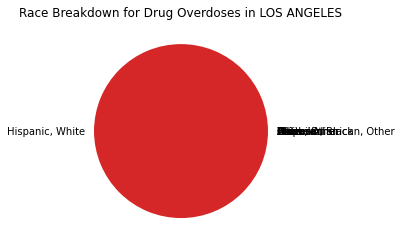

SAN FRANCISCO
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


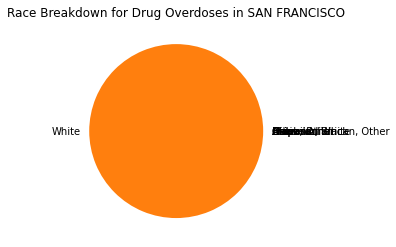

PROVIDENCE
Black 0
White 2
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


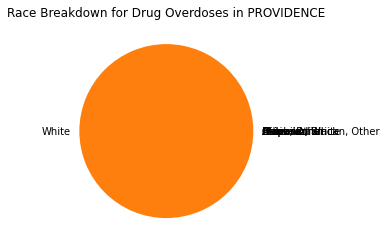

BERKSHIRE
Black 1
White 2
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


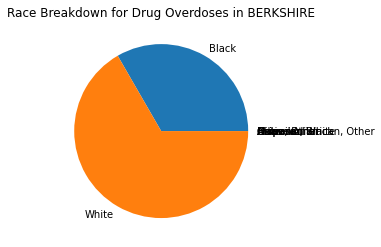

WASHINGTON
Black 0
White 4
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


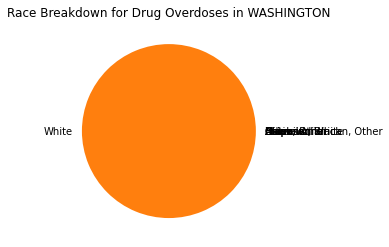

OSWEGO
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


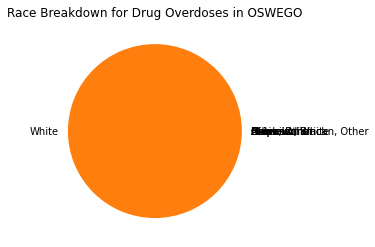

GLOUCESTER
Black 0
White 2
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


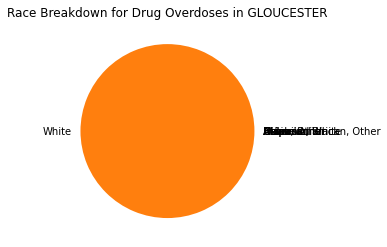

BRISTOL
Black 0
White 0
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 1
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


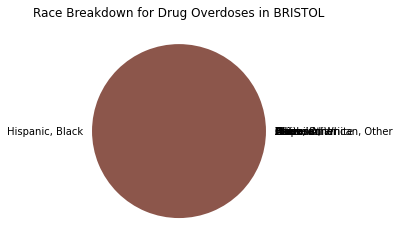

SCHENECTADY
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


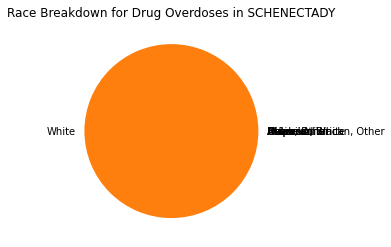

COLLIER
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


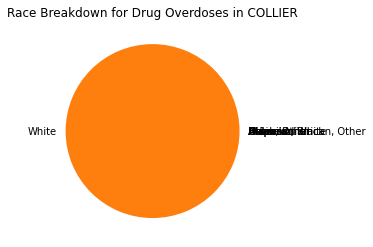

MADISON
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


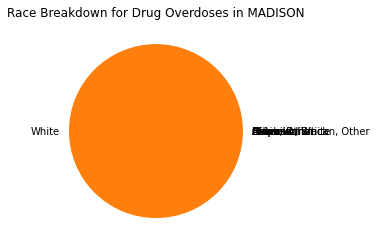

YANKTON
Black 0
White 0
Asian, Other 0
Hispanic, White 1
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


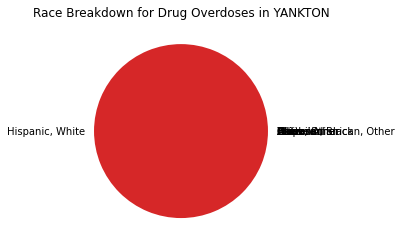

OCEAN
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


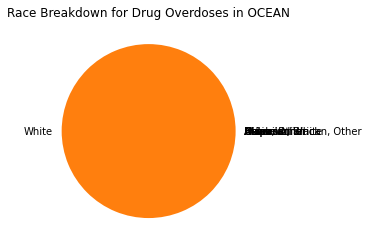

CUYAHOGA
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


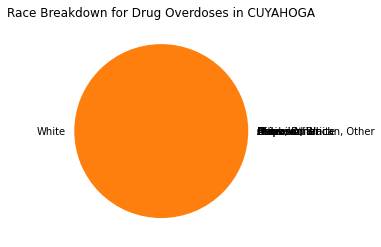

HAMPSHIRE
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


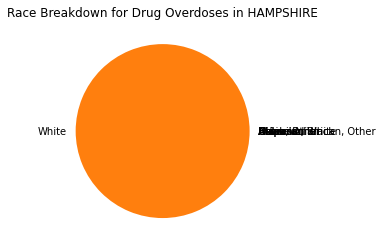

MOULTRIE
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


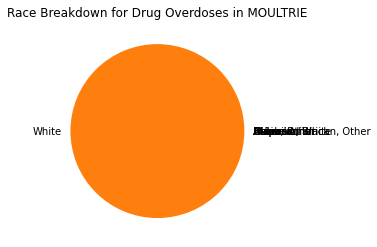

NEW CASTLE
Black 1
White 0
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


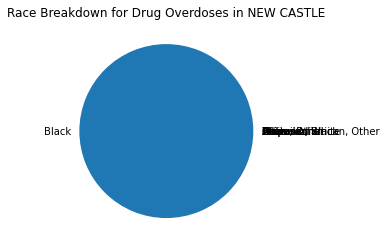

HIGHLANDS
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


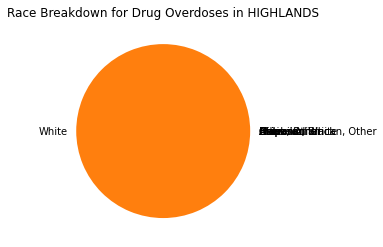

BREVARD
Black 0
White 0
Asian, Other 0
Hispanic, White 1
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


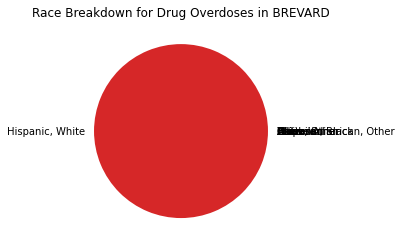

SARATOGA
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


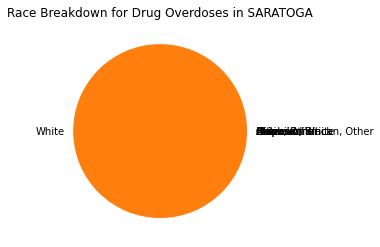

HORRY
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


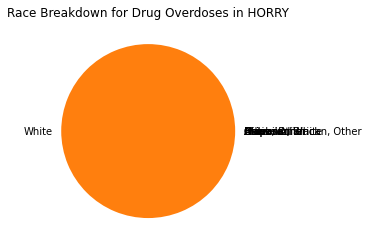

LEE
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


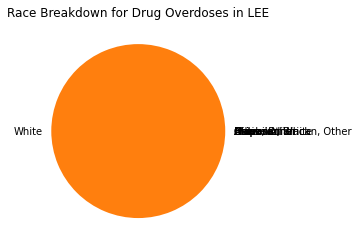

PASSAIC
Black 0
White 0
Asian, Other 1
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


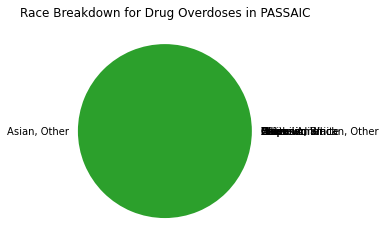

HARRIS
Black 1
White 2
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


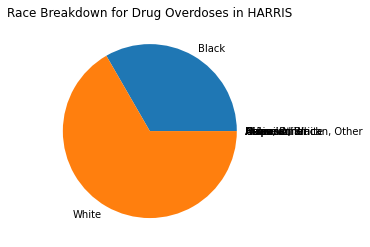

CLAY
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


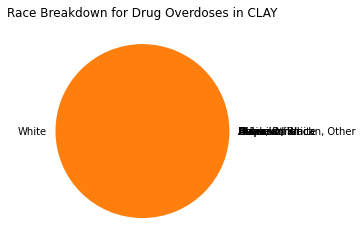

SANTA CRUZ
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


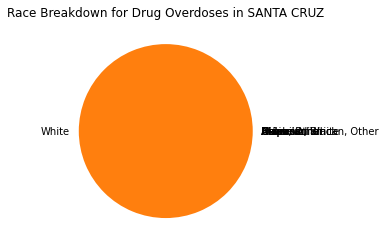

NEW HANOVER
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


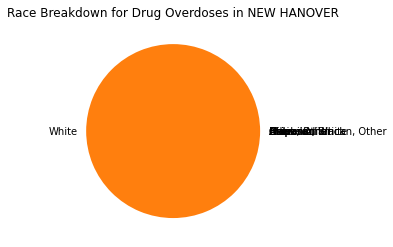

WESTMORELAND
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


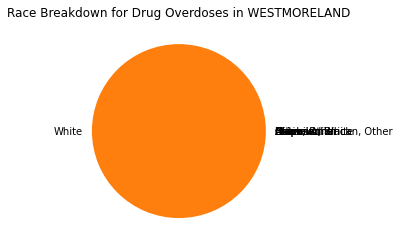

KENT
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


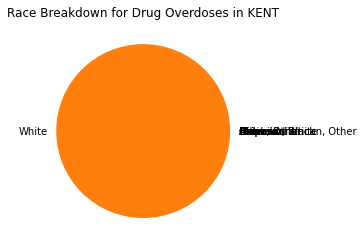

PUTNAM
Black 0
White 2
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


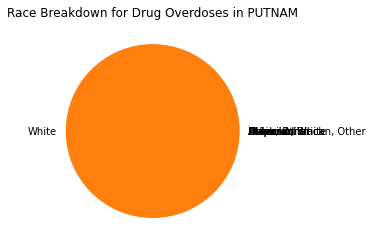

CHESAPEAKE CITY
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


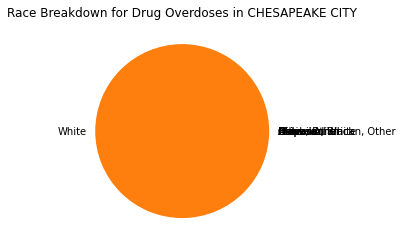

MERCER
Black 0
White 0
Asian, Other 0
Hispanic, White 1
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


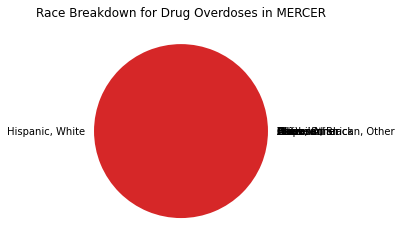

BALTIMORE
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


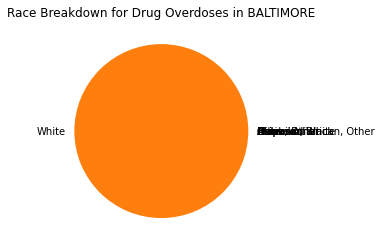

JEFFERSON
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


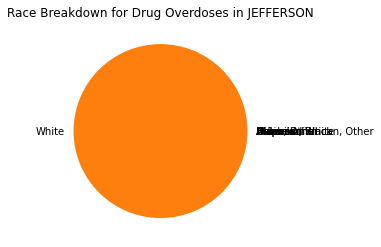

PALM BEACH
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


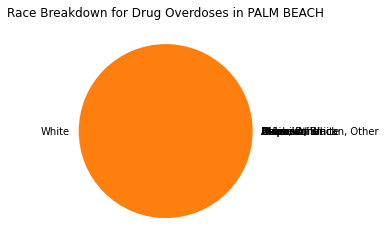

HILLSBOROUGH
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


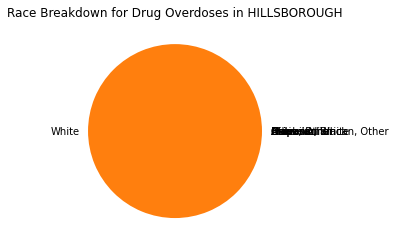

ST JOHN THE BAPTIST
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


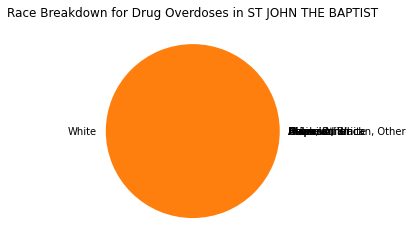

CUMBERLAND
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


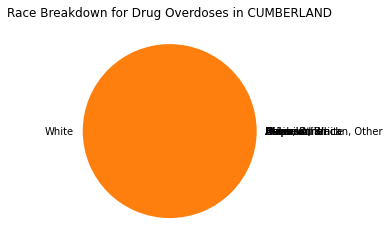

SOMERSET
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


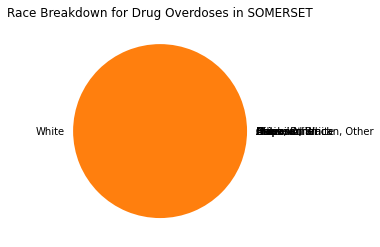

MIAMI-DADE
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


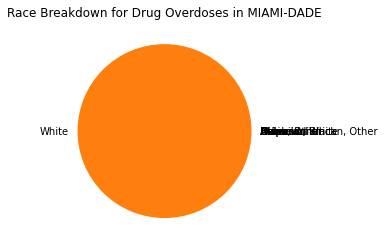

NEWPORT
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


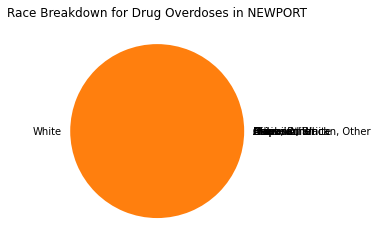

COOK
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


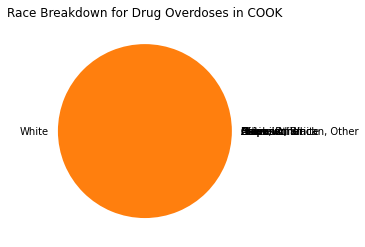

DAKOTA
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


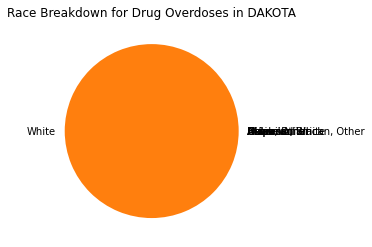

WELD
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


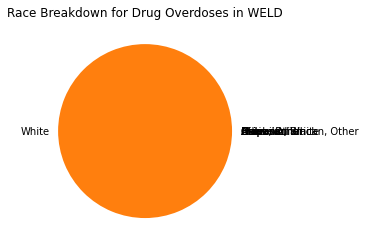

LAKE
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


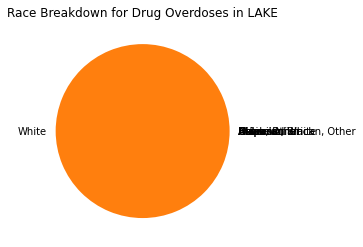

CLINTON
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


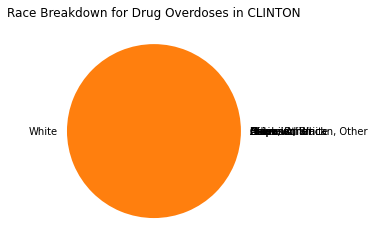

DALLAS
Black 0
White 0
Asian, Other 0
Hispanic, White 1
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


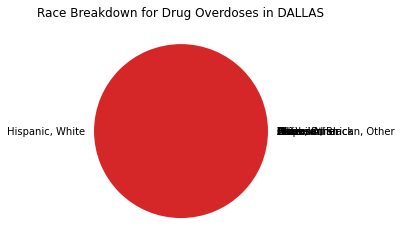

TIOGA
Black 0
White 1
Asian, Other 0
Hispanic, White 0
Asian Indian 0
Hispanic, Black 0
Unknown 0
Other 0
Chinese 0
Native American, Other 0
Hawaiian 0


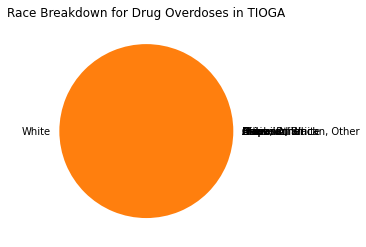

In [42]:
raceCountDict = {}
for h in KaggleData['ResidenceCounty'].unique():
    print(h)
    for i in KaggleData['Race'].unique():
        raceCountDict[i] = 0
        CountyDF = KaggleData[KaggleData['ResidenceCounty']==h]
        RaceDF = CountyDF[CountyDF['Race']==i]
        for j in RaceDF.iterrows():
            raceCountDict[i] += 1
        print(i, raceCountDict[i])
    plt.pie(raceCountDict.values(), labels = raceCountDict.keys())
    plt.title("Race Breakdown for Drug Overdoses in "+h)
    
    plt.show()

In [43]:
#Cloropleths

In [44]:
#We were unable to get this part of our project effectively working in time for it to be present in our report. 

In [45]:
#Statistical Analysis

In [46]:
#Preparation

In [47]:
#Modifies ResidenceCounty and DeathCounty to remove extra counties outside of connecticut, replaces with 'other'
#for cleaning purposes and simpler models
CTCounties = ['HARTFORD', 'FAIRFIELD', 'NEW HAVEN', 'LITCHFIELD', 'NEW LONDON', 'TOLLAND','WINDHAM', 'MIDDLESEX', 'SUFFOLK', 'WESTCHESTER']

def ResidenceChecker(county):
    for i in CTCounties:
        if i == county['ResidenceCounty']:
            return county['DeathCounty']
    return "OTHER"

def DeathChecker(county):
    for i in CTCounties:
        if i == county['DeathCounty']:
            return county['DeathCounty']
    return "OTHER"

KaggleData['ResidenceCountyInState'] = KaggleData.apply(ResidenceChecker, axis=1)
KaggleData['DeathCountyInState'] = KaggleData.apply(DeathChecker, axis=1)

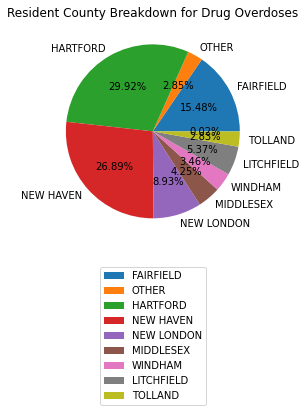

In [48]:
residentCountDict = {}
for i in KaggleData['ResidenceCountyInState'].unique():
    residentCountDict[i] = 0
    ResidentDF = KaggleData[KaggleData['ResidenceCountyInState']==i]
    for j in ResidentDF.iterrows():
        residentCountDict[i] += 1
plt.pie(residentCountDict.values(), labels = residentCountDict.keys(), autopct='%1.2f%%')
plt.title("Resident County Breakdown for Drug Overdoses")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.show()

In [49]:
KaggleData = pd.concat([KaggleData, pd.get_dummies(KaggleData['Sex'], prefix="Gender")], axis=1)
KaggleData = pd.concat([KaggleData, pd.get_dummies(KaggleData['Race'], prefix="Race")], axis=1)
KaggleData = pd.concat([KaggleData, pd.get_dummies(KaggleData['ResidenceCountyInState'], prefix="Residence")], axis=1)
KaggleData = pd.concat([KaggleData, pd.get_dummies(KaggleData['DeathCountyInState'], prefix="Death")], axis=1)

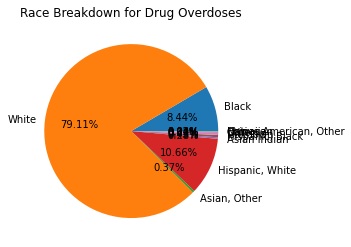

In [50]:
raceCountDict = {}
for i in KaggleData['Race'].unique():
    raceCountDict[i] = 0
    RaceDF = KaggleData[KaggleData['Race']==i]
    for j in RaceDF.iterrows():
        raceCountDict[i] += 1
plt.pie(raceCountDict.values(), labels = raceCountDict.keys(), autopct='%1.2f%%')
plt.title("Race Breakdown for Drug Overdoses")
plt.show()

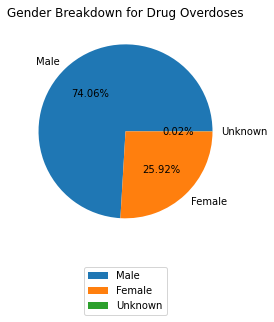

In [51]:
sexCountDict = {}
for i in KaggleData['Sex'].unique():
    sexCountDict[i] = 0
    SexDF = KaggleData[KaggleData['Sex']==i]
    for j in SexDF.iterrows():
        sexCountDict[i] += 1
plt.pie(sexCountDict.values(), labels = sexCountDict.keys(), autopct='%1.2f%%')
plt.title("Gender Breakdown for Drug Overdoses")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.show()

In [52]:
DummyColumns = ["Gender_Female", "Gender_Male", "Gender_Unknown", "Race_Asian Indian", "Race_Asian, Other", "Race_Black", "Race_Chinese", "Race_Hawaiian", "Race_Hispanic, Black", "Race_Hispanic, White", "Race_Native American, Other", "Race_Other", "Race_Unknown", "Race_White", "Residence_", "Residence_FAIRFIELD", "Residence_HARTFORD", "Residence_LITCHFIELD", "Residence_MIDDLESEX", "Residence_NEW HAVEN", "Residence_NEW LONDON", "Residence_OTHER", "Residence_TOLLAND" ,"Residence_WINDHAM", "Death_FAIRFIELD" ,"Death_HARTFORD", "Death_LITCHFIELD", "Death_MIDDLESEX", "Death_NEW HAVEN", "Death_NEW LONDON", "Death_OTHER", "Death_TOLLAND", "Death_WINDHAM"]

In [53]:
#Normalziation Testing

In [54]:
#Age is our only continuous data, so it is the only one we would test normalization for
from scipy import stats

print("Age: ", stats.normaltest(KaggleData['Age']))
#p value is low, so not normally distributed

Age:  NormaltestResult(statistic=569.3676407009744, pvalue=2.308807553798624e-124)


In [55]:
#Kruskal Testing
#uses stats library
#We use Kruskal Testing to compare continuous data with categorical data
#One Way ANOVA is the parametric method for this type of test, but since Age is not normalized, we are using Kruskal

In [56]:
#generating numeric values for kruskal
genderNum = []
raceNum = []
for index, rows in KaggleData.iterrows():
    if rows['Sex'] == "Female":
        genderNum.append(0)
    elif rows['Sex'] == "Male":
        genderNum.append(1)
    else:
        genderNum.append(2)

    if rows['Race'] == "Asian Indian":
        raceNum.append(0)
    elif rows['Race'] == "Asian, Other":
        raceNum.append(1)
    elif rows['Race'] == "Black":
        raceNum.append(2)
    elif rows['Race'] == "Chinese":
        raceNum.append(3)
    elif rows['Race'] == "Hawaiian":
        raceNum.append(4)
    elif rows['Race'] == "Hispanic, Black":
        raceNum.append(5)
    elif rows['Race'] == "Hispanic, White":
        raceNum.append(6)
    elif rows['Race'] == "Native American, Other":
        raceNum.append(7)
    elif rows['Race'] == "Other":
        raceNum.append(8)
    elif rows['Race'] == "Unknown":
        raceNum.append(9)
    else:
        raceNum.append(10)


In [57]:
#We spoke to the TA, went to office hours, tried what we could, however we could not get this working.
#We are leaving it in here as evidence that we attempted it, however this likely will not be in our final report
#because it is not functioning.
print("Gender")
print(stats.kruskal(KaggleData['Age'], genderNum))

print(stats.kruskal(KaggleData['Age'], KaggleData['Gender_Female']))
print(stats.kruskal(KaggleData['Age'], KaggleData['Gender_Male']))
print(stats.kruskal(KaggleData['Age'], KaggleData['Gender_Unknown']))

print("Race")
print(stats.kruskal(KaggleData['Age'], raceNum))

print(stats.kruskal(KaggleData['Age'], KaggleData['Race_Asian Indian']))
print(stats.kruskal(KaggleData['Age'], KaggleData['Race_Asian, Other']))
print(stats.kruskal(KaggleData['Age'], KaggleData['Race_Black']))
print(stats.kruskal(KaggleData['Age'], KaggleData['Race_Chinese']))
print(stats.kruskal(KaggleData['Age'], KaggleData['Race_Hawaiian']))
print(stats.kruskal(KaggleData['Age'], KaggleData['Race_Hispanic, Black']))
print(stats.kruskal(KaggleData['Age'], KaggleData['Race_Hispanic, White']))
print(stats.kruskal(KaggleData['Age'], KaggleData['Race_Native American, Other']))
print(stats.kruskal(KaggleData['Age'], KaggleData['Race_Other']))
print(stats.kruskal(KaggleData['Age'], KaggleData['Race_Unknown']))
print(stats.kruskal(KaggleData['Age'], KaggleData['Race_White']))

print("Drugs")
print(stats.mannwhitneyu(KaggleData['Age'], KaggleData['Heroin']))
print(stats.mannwhitneyu(KaggleData['Age'], KaggleData['Cocaine']))
print(stats.mannwhitneyu(KaggleData['Age'], KaggleData['Fentanyl']))
print(stats.mannwhitneyu(KaggleData['Age'], KaggleData['Fentanyl_Analogue']))
print(stats.mannwhitneyu(KaggleData['Age'], KaggleData['Oxycodone']))
print(stats.mannwhitneyu(KaggleData['Age'], KaggleData['Oxymorphone']))
print(stats.mannwhitneyu(KaggleData['Age'], KaggleData['Ethanol']))
print(stats.mannwhitneyu(KaggleData['Age'], KaggleData['Hydrocodone']))
print(stats.mannwhitneyu(KaggleData['Age'], KaggleData['Benzodiazepine']))
print(stats.mannwhitneyu(KaggleData['Age'], KaggleData['Methadone']))
print(stats.mannwhitneyu(KaggleData['Age'], KaggleData['Amphet']))
print(stats.mannwhitneyu(KaggleData['Age'], KaggleData['Tramad']))
print(stats.mannwhitneyu(KaggleData['Age'], KaggleData['Hydromorphone']))

Gender
KruskalResult(statistic=7786.133520674207, pvalue=0.0)
KruskalResult(statistic=7786.4776805180545, pvalue=0.0)
KruskalResult(statistic=7786.175676960346, pvalue=0.0)
KruskalResult(statistic=8426.485313593817, pvalue=0.0)
Race
KruskalResult(statistic=7862.110831142682, pvalue=0.0)
KruskalResult(statistic=8416.975343793541, pvalue=0.0)
KruskalResult(statistic=8414.063647629737, pvalue=0.0)
KruskalResult(statistic=8156.9980518996, pvalue=0.0)
KruskalResult(statistic=8425.751221707198, pvalue=0.0)
KruskalResult(statistic=8426.485313593817, pvalue=0.0)
KruskalResult(statistic=8411.884324365941, pvalue=0.0)
KruskalResult(statistic=8096.74604390141, pvalue=0.0)
KruskalResult(statistic=8426.485313593817, pvalue=0.0)
KruskalResult(statistic=8419.893830166375, pvalue=0.0)
KruskalResult(statistic=8411.884324365941, pvalue=0.0)
KruskalResult(statistic=7869.77297219405, pvalue=0.0)
Drugs
MannwhitneyuResult(statistic=0.0, pvalue=0.0)
MannwhitneyuResult(statistic=0.0, pvalue=0.0)
MannwhitneyuR

In [58]:
#Chi-Square Testing
#uses pandas library to create crosstab
#uses stats library for chi-square teest
#chi2_contingency method for chi-square testing between 2 categorical values

In [59]:
drugs = ['Heroin', 'Cocaine', 'Fentanyl','Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 
         'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Hydromorphone']

stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(KaggleData['Sex'], KaggleData['Race']))
print("Sex and Race : Stat:",stat,"p:", p)
stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(KaggleData['Sex'], KaggleData['ResidenceCountyInState']))
print("Sex and Residence County : Stat:",stat,"p:", p)
stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(KaggleData['Sex'], KaggleData['DeathCountyInState']))
print("Sex and Death County : Stat:",stat,"p:", p)
stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(KaggleData['Race'], KaggleData['ResidenceCountyInState']))
print("Race and Residence County : Stat:",stat,"p:", p)
stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(KaggleData['Race'], KaggleData['DeathCountyInState']))
print("Race and Death County : Stat:",stat,"p:", p)
stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(KaggleData['ResidenceCountyInState'], 
                                                            KaggleData['DeathCountyInState']))
print("Residence County and Death County : Stat:",stat,"p:", p)
print('----------')

def chiSquareTesting(DF):
    for i in drugs:
        crossTabulationRace = pd.crosstab(DF['Race'], DF[i])
        crossTabulationSex = pd.crosstab(DF['Sex'], DF[i])
        crossTabulationResidence = pd.crosstab(DF['ResidenceCountyInState'], DF[i])
        crossTabulationDeath = pd.crosstab(DF['DeathCountyInState'], DF[i])
        stat, p, dof, expected = stats.chi2_contingency(crossTabulationRace)
        print(i)
        print("Race and", i, ": Stat:",stat,"p:", p)
        stat, p, dof, expected = stats.chi2_contingency(crossTabulationSex)
        print("Sex and", i, ": Stat:",stat,"p:", p)
        stat, p, dof, expected = stats.chi2_contingency(crossTabulationResidence)
        print("Residence County and", i, ": Stat:",stat,"p:", p)
        stat, p, dof, expected = stats.chi2_contingency(crossTabulationDeath)
        print("Death County and", i, ": Stat:",stat,"p:", p)
        print('----------')
chiSquareTesting(KaggleData)

Sex and Race : Stat: 27.23572931105873 p: 0.12876125152908183
Sex and Residence County : Stat: 15.245005143682672 p: 0.6450811006284167
Sex and Death County : Stat: 14.32250821955768 p: 0.5747012235479104
Race and Residence County : Stat: 228.3372817967178 p: 5.3995174651528036e-14
Race and Death County : Stat: 220.13292438248538 p: 5.01749697351289e-15
Residence County and Death County : Stat: 35881.0012625704 p: 0.0
----------
Heroin
Race and Heroin : Stat: 34.75004073666258 p: 0.00013773931375206787
Sex and Heroin : Stat: 58.18262480385095 p: 2.321686374063325e-13
Residence County and Heroin : Stat: 21.825963760357787 p: 0.009447217118407784
Death County and Heroin : Stat: 23.3440499042253 p: 0.0029494995800709496
----------
Cocaine
Race and Cocaine : Stat: 147.6520404247995 p: 1.1330255685144205e-26
Sex and Cocaine : Stat: 2.2999742811440087 p: 0.31664084117297014
Residence County and Cocaine : Stat: 25.850251210804903 p: 0.002161454524913335
Death County and Cocaine : Stat: 25.543

In [60]:
#Machine Learning

In [61]:
#Logistic Regression
#performed with sklearn library
#confusion matrix made with metrics, visualized with seaborn
#look into adding age, possibly other values?

Defaulting to user installation because normal site-packages is not writeable


/home/students/jartwest/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

      Female       0.60      0.51      0.55       901
        Male       0.59      0.68      0.63       940
     Unknown       1.00      1.00      1.00       890

    accuracy                           0.73      2731
   macro avg       0.73      0.73      0.73      2731
weighted avg       0.73      0.73      0.73      2731



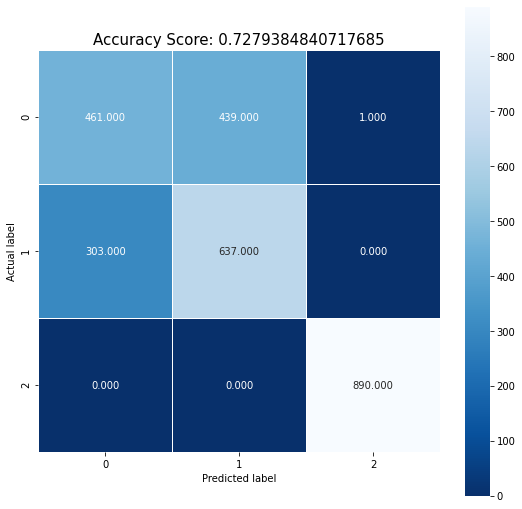

In [62]:
!pip install imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler

xDrugDeaths = KaggleData[['Age', 'Heroin', 'Cocaine', 'Fentanyl','Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Hydromorphone']]
yDrugDeaths = KaggleData['Sex']

ros = RandomOverSampler(random_state=12345)
xOverSample, yOverSample = ros.fit_resample(xDrugDeaths, yDrugDeaths)

X_train, X_test, y_train, y_test = train_test_split(xOverSample, yOverSample)

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

predictions = logReg.predict(X_test)
score = logReg.score(X_test, y_test)
print(classification_report(y_test, predictions))

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

/home/students/jartwest/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                        precision    recall  f1-score   support

          Asian Indian       0.37      0.33      0.35       993
          Asian, Other       0.20      0.25      0.23       958
                 Black       0.36      0.40      0.38       981
               Chinese       0.76      1.00      0.86      1006
              Hawaiian       0.82      1.00      0.90       970
       Hispanic, Black       0.19      0.29      0.23       971
       Hispanic, White       0.17      0.10      0.12       925
Native American, Other       0.98      1.00      0.99       959
                 Other       0.20      0.20      0.20       979
               Unknown       0.13      0.09      0.11       952
                 White       0.32      0.13      0.19      1001

              accuracy                           0.44     10695
             macro avg       0.41      0.44      0.41     10695
          weighted avg       0.41      0.44      0.42     10695



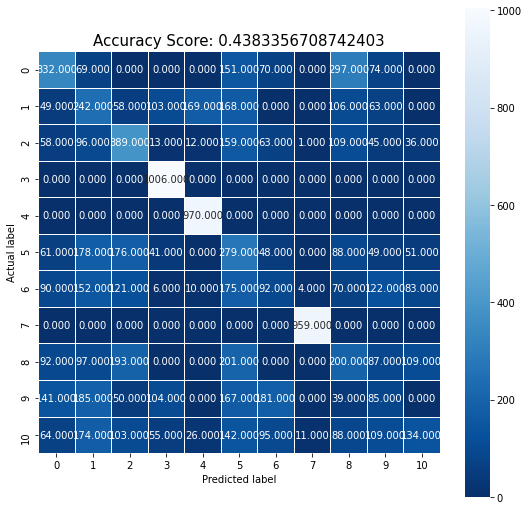

In [63]:
xDrugDeaths = KaggleData[['Age', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Hydromorphone']]

yDrugDeaths = KaggleData['Race']

ros = RandomOverSampler(random_state=12345)
xOverSample, yOverSample = ros.fit_resample(xDrugDeaths, yDrugDeaths)

X_train, X_test, y_train, y_test = train_test_split(xOverSample, yOverSample)

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

predictions = logReg.predict(X_test)
score = logReg.score(X_test, y_test)
print(classification_report(y_test, predictions))

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

/home/students/jartwest/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

                   0.78      1.00      0.88       365
   FAIRFIELD       0.14      0.07      0.09       388
    HARTFORD       0.13      0.18      0.15       345
  LITCHFIELD       0.16      0.23      0.19       369
   MIDDLESEX       0.31      0.01      0.02       378
   NEW HAVEN       0.17      0.19      0.18       357
  NEW LONDON       0.15      0.11      0.13       373
       OTHER       0.17      0.27      0.21       358
     TOLLAND       0.19      0.33      0.24       374
     WINDHAM       0.21      0.08      0.12       371

    accuracy                           0.25      3678
   macro avg       0.24      0.25      0.22      3678
weighted avg       0.24      0.25      0.22      3678



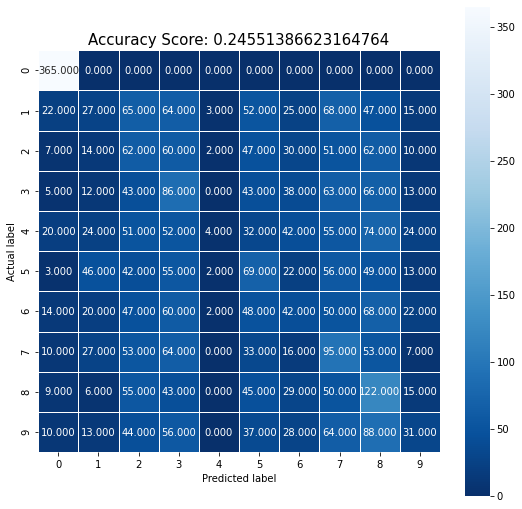

In [64]:
xDrugDeaths = KaggleData[['Age', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Hydromorphone']]

yDrugDeaths = KaggleData['ResidenceCountyInState']

ros = RandomOverSampler(random_state=12345)
xOverSample, yOverSample = ros.fit_resample(xDrugDeaths, yDrugDeaths)

X_train, X_test, y_train, y_test = train_test_split(xOverSample, yOverSample)

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

predictions = logReg.predict(X_test)
score = logReg.score(X_test, y_test)
print(classification_report(y_test, predictions))

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

/home/students/jartwest/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

   FAIRFIELD       0.24      0.02      0.04       390
    HARTFORD       0.18      0.18      0.18       404
  LITCHFIELD       0.17      0.28      0.21       382
   MIDDLESEX       0.21      0.05      0.08       368
   NEW HAVEN       0.20      0.23      0.22       371
  NEW LONDON       0.17      0.03      0.05       365
       OTHER       0.62      1.00      0.76       373
     TOLLAND       0.17      0.33      0.23       380
     WINDHAM       0.15      0.17      0.16       369

    accuracy                           0.25      3402
   macro avg       0.23      0.25      0.21      3402
weighted avg       0.23      0.25      0.21      3402



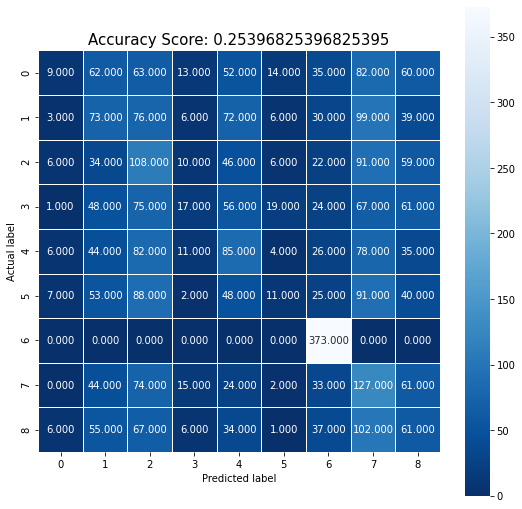

In [65]:
xDrugDeaths = KaggleData[['Age', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Hydromorphone']]
yDrugDeaths = KaggleData['DeathCountyInState']

ros = RandomOverSampler(random_state=12345)
xOverSample, yOverSample = ros.fit_resample(xDrugDeaths, yDrugDeaths)

X_train, X_test, y_train, y_test = train_test_split(xOverSample, yOverSample)

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

predictions = logReg.predict(X_test)
score = logReg.score(X_test, y_test)
print(classification_report(y_test, predictions))

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Logistic Regression
Heroin
              precision    recall  f1-score   support

           0       0.60      0.44      0.51       622
           1       0.55      0.70      0.62       619

    accuracy                           0.57      1241
   macro avg       0.58      0.57      0.56      1241
weighted avg       0.58      0.57      0.56      1241

-----------
Cocaine
              precision    recall  f1-score   support

           0       0.55      0.85      0.67       865
           1       0.69      0.32      0.44       877

    accuracy                           0.58      1742
   macro avg       0.62      0.59      0.56      1742
weighted avg       0.62      0.58      0.55      1742

-----------
Fentanyl
              precision    recall  f1-score   support

           0       0.57      0.52      0.55       691
           1       0.57      0.62      0.59       701

    accuracy                           0.57      1392
   macro avg       0.57      0.57      0.57      1392
weight

/home/students/jartwest/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-----------
Oxycodone
              precision    recall  f1-score   support

           0       0.56      0.54      0.55      1099
           1       0.54      0.57      0.55      1061

    accuracy                           0.55      2160
   macro avg       0.55      0.55      0.55      2160
weighted avg       0.55      0.55      0.55      2160

-----------
Oxymorphone
              precision    recall  f1-score   support

           0       0.64      0.48      0.55      1209
           1       0.58      0.73      0.65      1197

    accuracy                           0.60      2406
   macro avg       0.61      0.60      0.60      2406
weighted avg       0.61      0.60      0.60      2406



/home/students/jartwest/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-----------
Ethanol
              precision    recall  f1-score   support

           0       0.53      0.34      0.42       927
           1       0.52      0.70      0.60       937

    accuracy                           0.52      1864
   macro avg       0.53      0.52      0.51      1864
weighted avg       0.53      0.52      0.51      1864

-----------
Hydrocodone
              precision    recall  f1-score   support

           0       0.60      0.72      0.66      1208
           1       0.65      0.51      0.57      1193

    accuracy                           0.62      2401
   macro avg       0.62      0.62      0.61      2401
weighted avg       0.62      0.62      0.62      2401



/home/students/jartwest/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-----------
Benzodiazepine
              precision    recall  f1-score   support

           0       0.60      0.56      0.58       889
           1       0.60      0.64      0.62       918

    accuracy                           0.60      1807
   macro avg       0.60      0.60      0.60      1807
weighted avg       0.60      0.60      0.60      1807



/home/students/jartwest/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-----------
Methadone
              precision    recall  f1-score   support

           0       0.61      0.62      0.61      1104
           1       0.62      0.61      0.62      1126

    accuracy                           0.61      2230
   macro avg       0.61      0.61      0.61      2230
weighted avg       0.61      0.61      0.61      2230



/home/students/jartwest/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-----------
Amphet
              precision    recall  f1-score   support

           0       0.55      0.58      0.57      1164
           1       0.58      0.55      0.56      1217

    accuracy                           0.56      2381
   macro avg       0.57      0.57      0.56      2381
weighted avg       0.57      0.56      0.56      2381



/home/students/jartwest/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-----------
Tramad
              precision    recall  f1-score   support

           0       0.58      0.65      0.61      1218
           1       0.58      0.51      0.55      1177

    accuracy                           0.58      2395
   macro avg       0.58      0.58      0.58      2395
weighted avg       0.58      0.58      0.58      2395



/home/students/jartwest/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-----------
Hydromorphone
              precision    recall  f1-score   support

           0       0.62      0.74      0.67      1216
           1       0.68      0.55      0.61      1231

    accuracy                           0.65      2447
   macro avg       0.65      0.65      0.64      2447
weighted avg       0.65      0.65      0.64      2447



/home/students/jartwest/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-----------


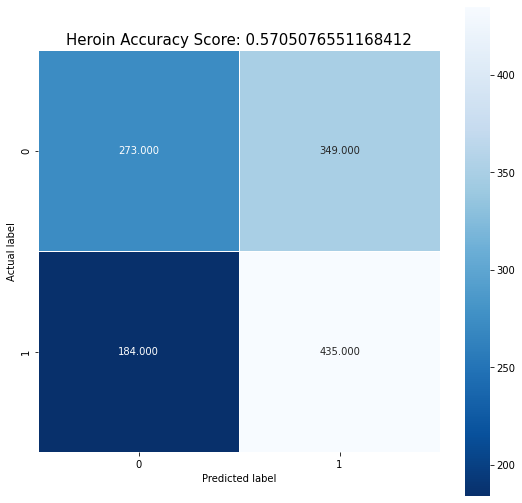

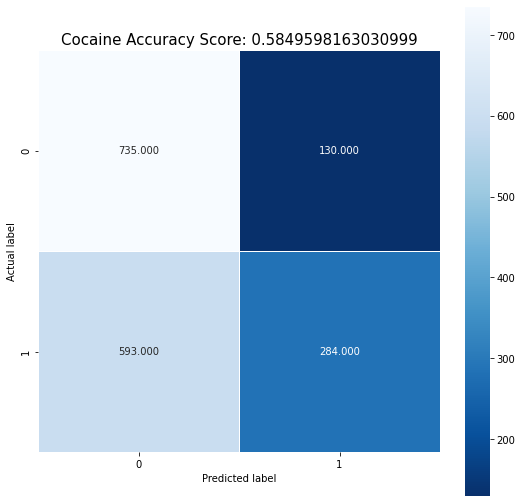

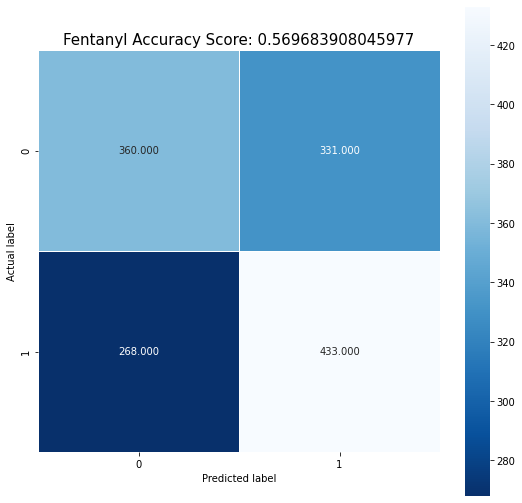

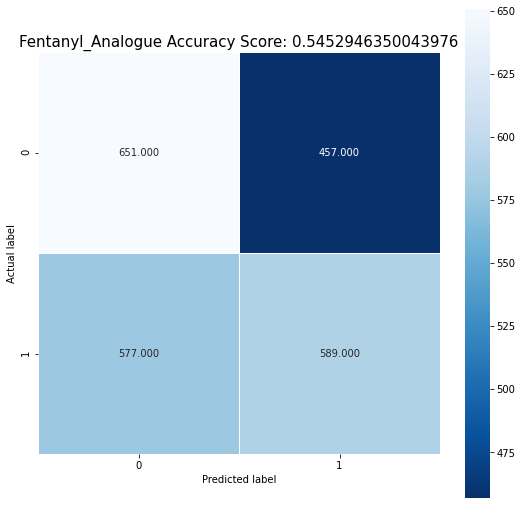

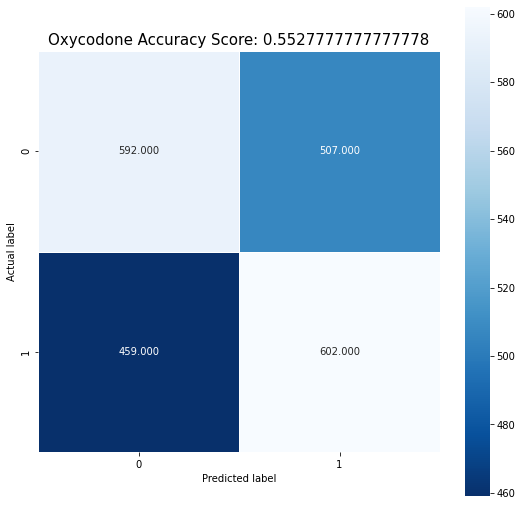

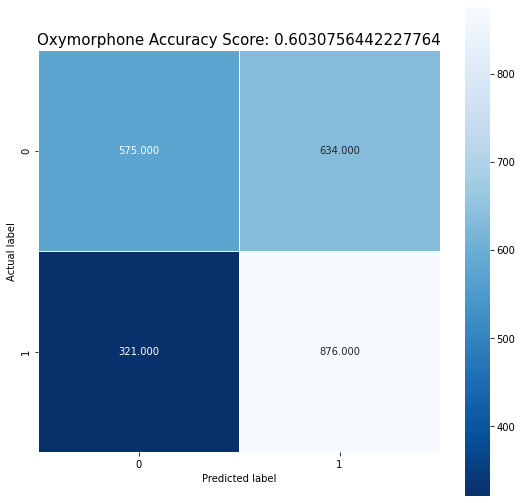

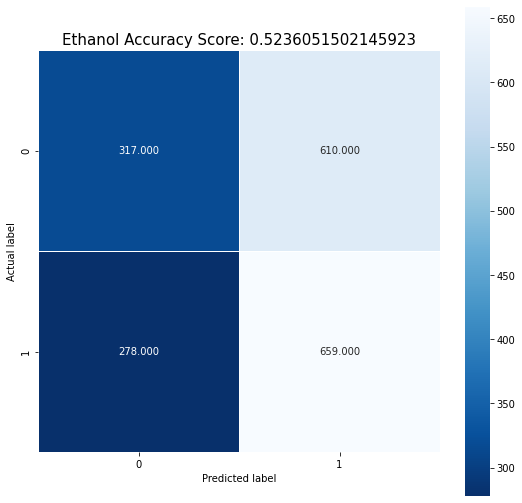

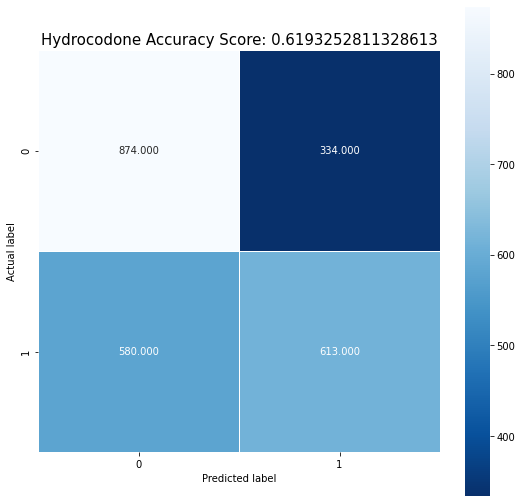

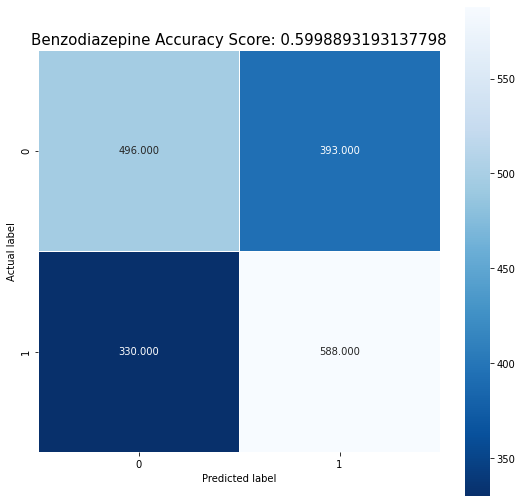

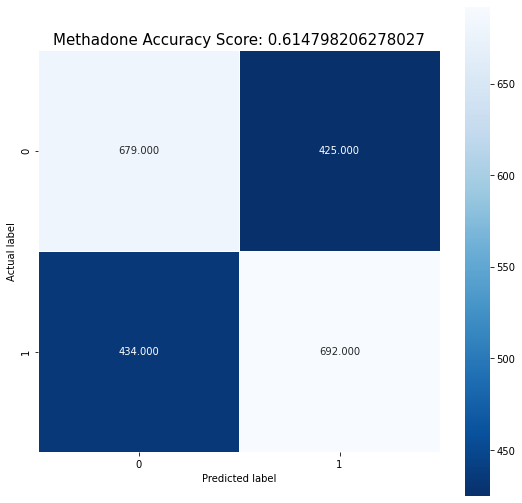

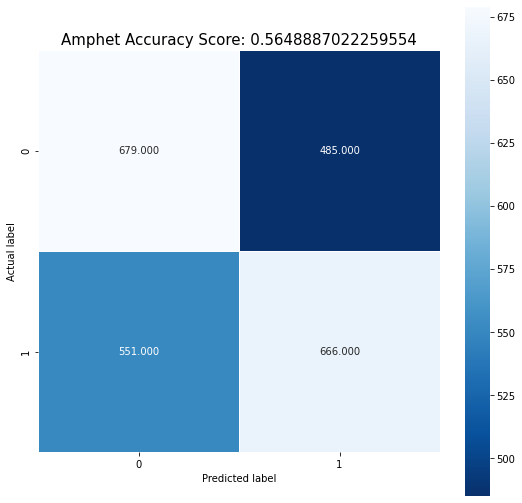

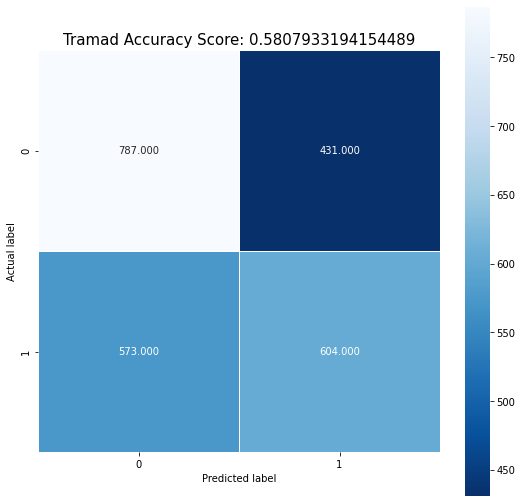

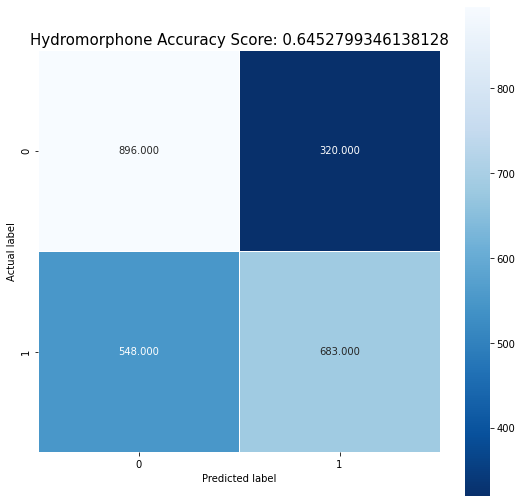

In [66]:
def DrugLogistic(DF):
    print("Logistic Regression")
    for i in drugs:
        print(i)
        xDrugDeaths = DF[["Gender_Female", "Gender_Male", "Gender_Unknown", "Race_Asian Indian", "Race_Asian, Other", 
                          "Race_Black", "Race_Chinese", "Race_Hawaiian", "Race_Hispanic, Black", "Race_Hispanic, White",
                          "Race_Native American, Other", "Race_Other", "Race_Unknown", "Race_White", "Residence_", 
                          "Residence_FAIRFIELD", "Residence_HARTFORD", "Residence_LITCHFIELD", "Residence_MIDDLESEX", 
                          "Residence_NEW HAVEN", "Residence_NEW LONDON", "Residence_OTHER", "Residence_TOLLAND" ,
                          "Residence_WINDHAM", "Death_FAIRFIELD" ,"Death_HARTFORD", "Death_LITCHFIELD", 
                          "Death_MIDDLESEX", "Death_NEW HAVEN", "Death_NEW LONDON", "Death_OTHER", "Death_TOLLAND", 
                          "Death_WINDHAM"]]
        yDrugDeaths = DF[i]
                         
        ros = RandomOverSampler(random_state=12345)
        xOverSample, yOverSample = ros.fit_resample(xDrugDeaths, yDrugDeaths)

        X_train, X_test, y_train, y_test = train_test_split(xOverSample, yOverSample)

        logReg = LogisticRegression()
        logReg.fit(X_train, y_train)
        predictions = logReg.predict(X_test)
        score = logReg.score(X_test, y_test)
        print(classification_report(y_test, predictions))

        cm = metrics.confusion_matrix(y_test, predictions)
        plt.figure(figsize=(9,9))
        sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        all_sample_title = i+' Accuracy Score: {0}'.format(score)
        plt.title(all_sample_title, size = 15);
        
        print("-----------")
DrugLogistic(KaggleData)

In [67]:
#Random Forest
#performed with sklearn library
#confusion matrix made with metrics, visualized with seaborn

Overall Accuracy for RFC =  0.809959721713658
              precision    recall  f1-score   support

      Female       0.70      0.75      0.73       914
        Male       0.72      0.67      0.69       883
     Unknown       1.00      1.00      1.00       934

    accuracy                           0.81      2731
   macro avg       0.81      0.81      0.81      2731
weighted avg       0.81      0.81      0.81      2731



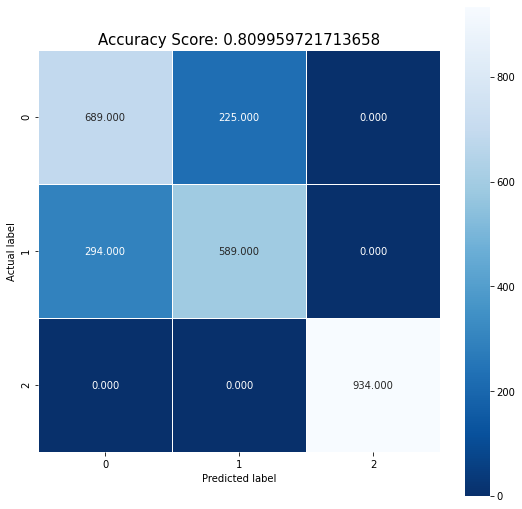

In [68]:
from sklearn.ensemble import RandomForestClassifier

xDrugDeaths = KaggleData[['Age', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Hydromorphone']]

yDrugDeaths = KaggleData['Sex']

ros = RandomOverSampler(random_state=12345)
xOverSample, yOverSample = ros.fit_resample(xDrugDeaths, yDrugDeaths)

X_train, X_test, y_train, y_test = train_test_split(xOverSample, yOverSample)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predicted = rfc.predict(X_test)
rfc_expected = y_test
rfc_matches = (rfc_predicted == rfc_expected)
score = rfc.score(X_test, y_test)
print("Overall Accuracy for RFC = ", rfc_matches.sum()/float(len(rfc_matches)))
print(classification_report(y_test, rfc_predicted))

cm = metrics.confusion_matrix(rfc_expected, rfc_predicted)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [69]:
print("Gender Random Forest")
features = ['Age', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 
            'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Hydromorphone']

featureImportance = rfc.feature_importances_
for i in range(len(features)):
    print(features[i], featureImportance[i])

Gender Random Forest
Age 0.43513121507635266
Heroin 0.037296036766497884
Cocaine 0.016913555524170645
Fentanyl 0.021720452463759816
Fentanyl_Analogue 0.00716298503748983
Oxycodone 0.05784974861129681
Oxymorphone 0.004082944843480839
Ethanol 0.016056187132448937
Hydrocodone 0.006172766839724862
Benzodiazepine 0.02040583379435837
Methadone 0.05239092955488442
Amphet 0.006106424841603244
Tramad 0.11054902905479068
Hydromorphone 0.20816189045914102


Overall Accuracy for RFC =  0.741253051261188
                 precision    recall  f1-score   support

   Asian Indian       0.00      0.00      0.00         6
   Asian, Other       0.00      0.00      0.00         7
          Black       0.25      0.15      0.19       101
        Chinese       0.00      0.00      0.00         1
Hispanic, Black       0.00      0.00      0.00         7
Hispanic, White       0.10      0.05      0.07       121
          Other       0.00      0.00      0.00         5
        Unknown       0.00      0.00      0.00         6
          White       0.81      0.91      0.86       975

       accuracy                           0.74      1229
      macro avg       0.13      0.12      0.12      1229
   weighted avg       0.67      0.74      0.70      1229



/home/students/jartwest/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/students/jartwest/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/students/jartwest/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


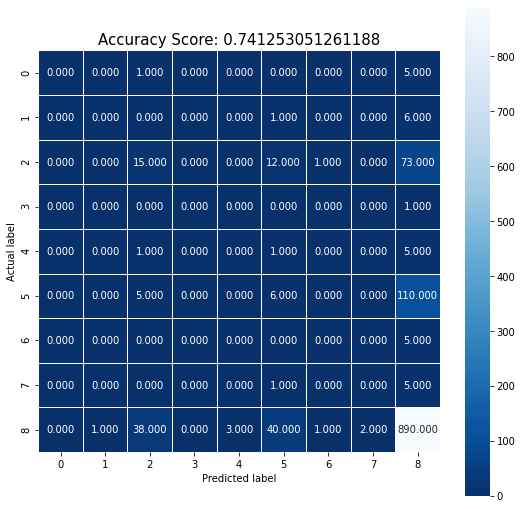

In [70]:
xDrugDeaths = KaggleData[['Age', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Hydromorphone']]

yDrugDeaths = KaggleData['Race']
X_train, X_test, y_train, y_test = train_test_split(xDrugDeaths, yDrugDeaths)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predicted = rfc.predict(X_test)
rfc_expected = y_test
rfc_matches = (rfc_predicted == rfc_expected)
score = rfc.score(X_test, y_test)

print("Overall Accuracy for RFC = ", rfc_matches.sum()/float(len(rfc_matches)))
print(classification_report(y_test, rfc_predicted))


cm = metrics.confusion_matrix(rfc_expected, rfc_predicted)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [71]:
print("Race Random Forest")
features = ['Age','Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 
            'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Hydromorphone']
featureImportance = rfc.feature_importances_
for i in range(len(features)):
    print(features[i], featureImportance[i])

Race Random Forest
Age 0.6865598219099796
Heroin 0.03753970409021247
Cocaine 0.04303074412008006
Fentanyl 0.03826989672407136
Fentanyl_Analogue 0.020542912198962263
Oxycodone 0.025715101266206734
Oxymorphone 0.005964977959472873
Ethanol 0.03929992610101987
Hydrocodone 0.011540571092870244
Benzodiazepine 0.03951369415968889
Methadone 0.024201331885193193
Amphet 0.01233194140693824
Tramad 0.013147279580815208
Hydromorphone 0.002342097504489074


Overall Accuracy for RFC =  0.6237085372485046
              precision    recall  f1-score   support

                   1.00      1.00      1.00       376
   FAIRFIELD       0.55      0.44      0.49       372
    HARTFORD       0.36      0.16      0.22       372
  LITCHFIELD       0.62      0.64      0.63       398
   MIDDLESEX       0.60      0.69      0.64       394
   NEW HAVEN       0.45      0.26      0.33       351
  NEW LONDON       0.52      0.56      0.54       344
       OTHER       0.67      0.88      0.76       343
     TOLLAND       0.64      0.85      0.73       354
     WINDHAM       0.58      0.75      0.65       374

    accuracy                           0.62      3678
   macro avg       0.60      0.62      0.60      3678
weighted avg       0.60      0.62      0.60      3678



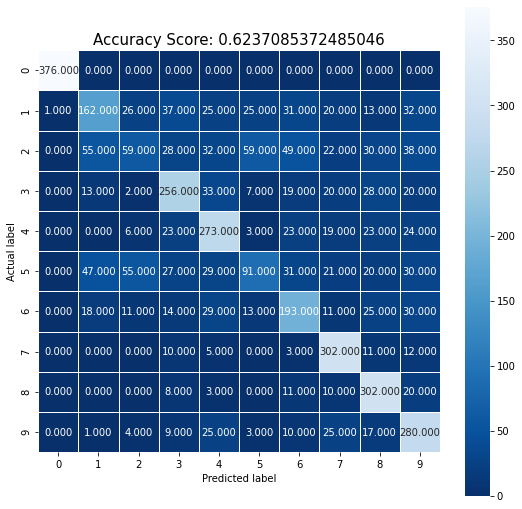

In [72]:
xDrugDeaths = KaggleData[['Age','Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Hydromorphone']]

yDrugDeaths = KaggleData['ResidenceCountyInState']

ros = RandomOverSampler(random_state=12345)
xOverSample, yOverSample = ros.fit_resample(xDrugDeaths, yDrugDeaths)

X_train, X_test, y_train, y_test = train_test_split(xOverSample, yOverSample)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predicted = rfc.predict(X_test)
rfc_expected = y_test
rfc_matches = (rfc_predicted == rfc_expected)
score = rfc.score(X_test, y_test)

print("Overall Accuracy for RFC = ", rfc_matches.sum()/float(len(rfc_matches)))
print(classification_report(y_test, rfc_predicted))

cm = metrics.confusion_matrix(rfc_expected, rfc_predicted)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [73]:
print("ResidenceCountyInState Feature Importance")
features = ['Age','Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 
            'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Hydromorphone']
featureImportance = rfc.feature_importances_
for i in range(len(features)):
    print(features[i], featureImportance[i])

ResidenceCountyInState Feature Importance
Age 0.649231247595052
Heroin 0.03897018719416015
Cocaine 0.04967546604583909
Fentanyl 0.04889423724502874
Fentanyl_Analogue 0.0191495568300601
Oxycodone 0.023554287127091237
Oxymorphone 0.010309002130614187
Ethanol 0.05945418908826982
Hydrocodone 0.010945041532616625
Benzodiazepine 0.03908871705573355
Methadone 0.016300777551146572
Amphet 0.015572933747370815
Tramad 0.01530706888223018
Hydromorphone 0.0035472879747869353


Overall Accuracy for RFC =  0.6196355085243974
              precision    recall  f1-score   support

   FAIRFIELD       0.54      0.46      0.50       380
    HARTFORD       0.37      0.19      0.25       394
  LITCHFIELD       0.61      0.73      0.67       365
   MIDDLESEX       0.60      0.75      0.67       367
   NEW HAVEN       0.44      0.25      0.32       396
  NEW LONDON       0.57      0.55      0.56       392
       OTHER       0.99      1.00      1.00       366
     TOLLAND       0.63      0.91      0.75       357
     WINDHAM       0.63      0.81      0.71       385

    accuracy                           0.62      3402
   macro avg       0.60      0.63      0.60      3402
weighted avg       0.59      0.62      0.59      3402



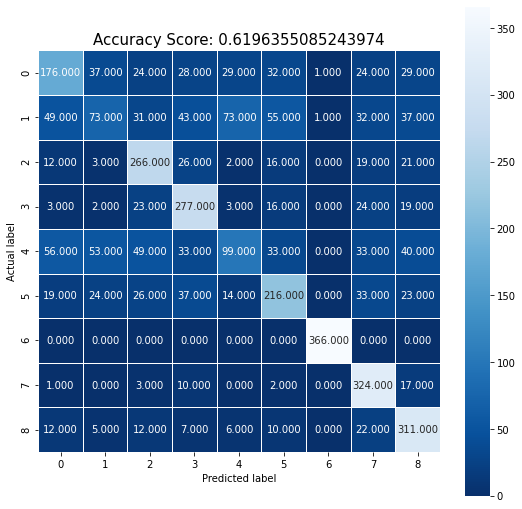

In [74]:
xDrugDeaths = KaggleData[['Age', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Hydromorphone']]

yDrugDeaths = KaggleData['DeathCountyInState']

ros = RandomOverSampler(random_state=12345)
xOverSample, yOverSample = ros.fit_resample(xDrugDeaths, yDrugDeaths)

X_train, X_test, y_train, y_test = train_test_split(xOverSample, yOverSample)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predicted = rfc.predict(X_test)
rfc_expected = y_test
rfc_matches = (rfc_predicted == rfc_expected)
score = rfc.score(X_test, y_test)

print("Overall Accuracy for RFC = ", rfc_matches.sum()/float(len(rfc_matches)))
print(classification_report(y_test, rfc_predicted))

cm = metrics.confusion_matrix(rfc_expected, rfc_predicted)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [75]:
print("DeathCountyInState Feature Importance")
features = ['Age', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 
            'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Hydromorphone']
featureImportance = rfc.feature_importances_
for i in range(len(features)):
    print(features[i], featureImportance[i])

DeathCountyInState Feature Importance
Age 0.6396844679736801
Heroin 0.043416875043656204
Cocaine 0.04030294428703228
Fentanyl 0.04243022388765737
Fentanyl_Analogue 0.01829749200296143
Oxycodone 0.029482052166597147
Oxymorphone 0.010793067659377986
Ethanol 0.049031587753004764
Hydrocodone 0.012204365112326239
Benzodiazepine 0.0365001445164985
Methadone 0.042619355756766605
Amphet 0.015936505949725236
Tramad 0.01586506012359659
Hydromorphone 0.0034358577671195095


Random Forest
Heroin
Overall Accuracy for RFC =  0.572119258662369
              precision    recall  f1-score   support

           0       0.58      0.61      0.59       642
           1       0.56      0.54      0.55       599

    accuracy                           0.57      1241
   macro avg       0.57      0.57      0.57      1241
weighted avg       0.57      0.57      0.57      1241

Gender_Female 0.11587785164967981
Gender_Male 0.0970332591278824
Gender_Unknown 0.0
Race_Asian Indian 0.025956903448741624
Race_Asian, Other 0.03276585856916805
Race_Black 0.0801480947891592
Race_Chinese 0.0038097923531672695
Race_Hawaiian 0.00460765953114364
Race_Hispanic, Black 0.02702277721589788
Race_Hispanic, White 0.06339919910898355
Race_Native American, Other 0.0050840148814340356
Race_Other 0.023821917233974466
Race_Unknown 0.03924103681867342
Race_White 0.06399523509001312
Residence_ 0.0
Residence_FAIRFIELD 0.02103521626786865
Residence_HARTFORD 0.022799352043029398
Residence_LITCHFIELD 0.

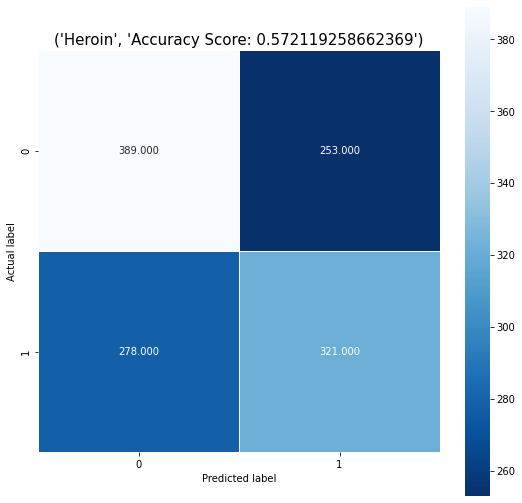

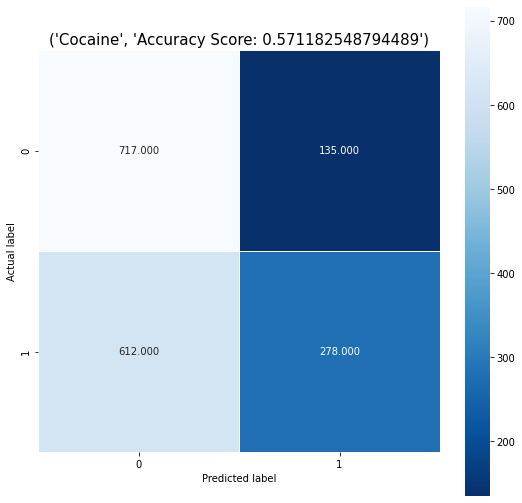

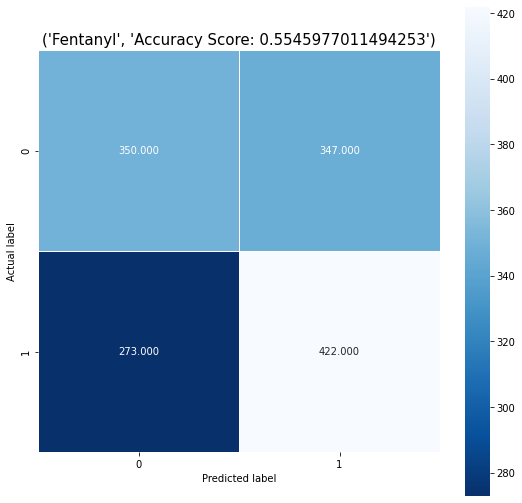

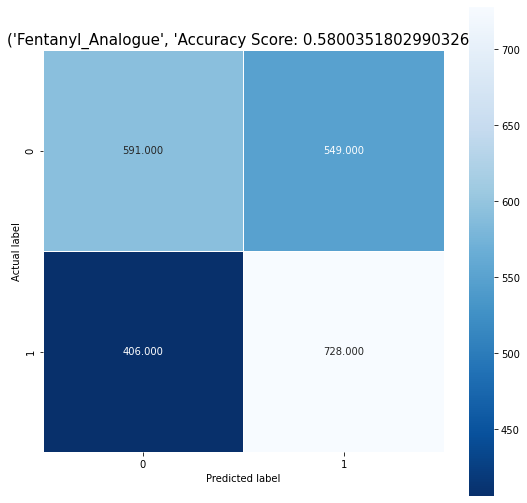

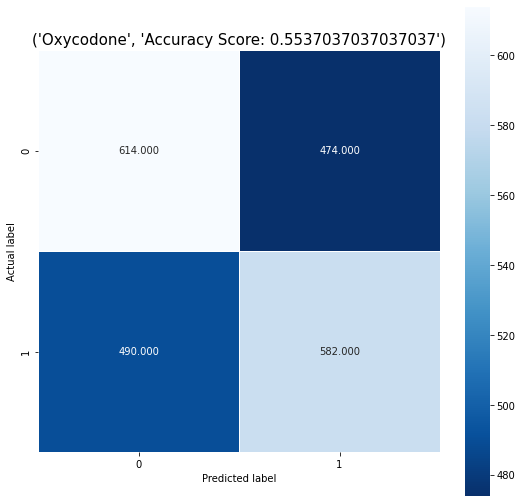

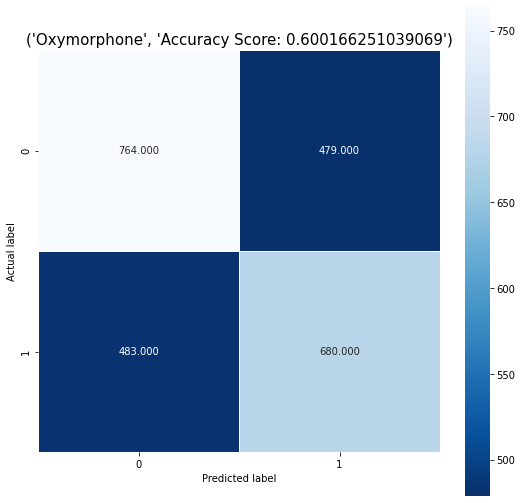

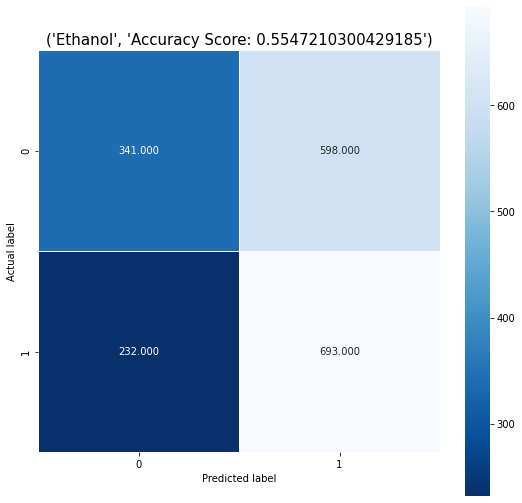

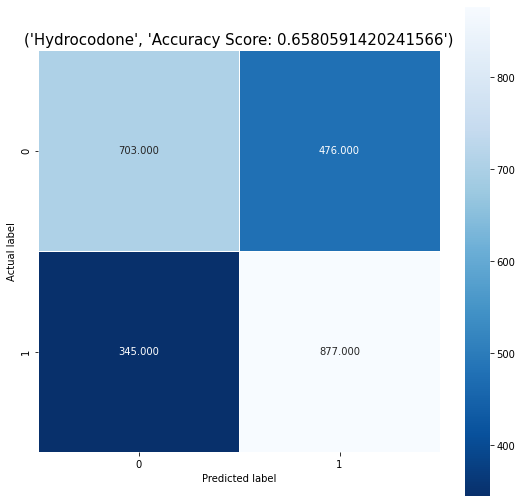

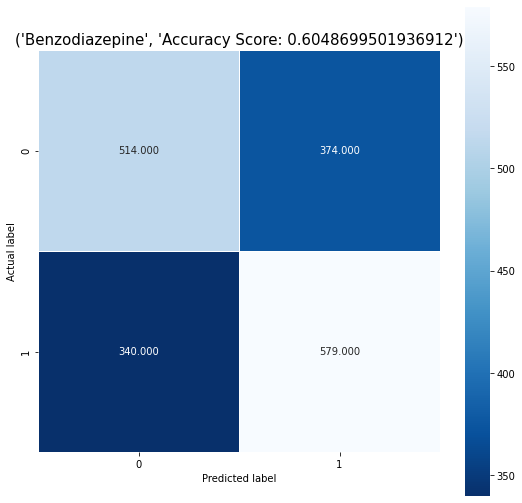

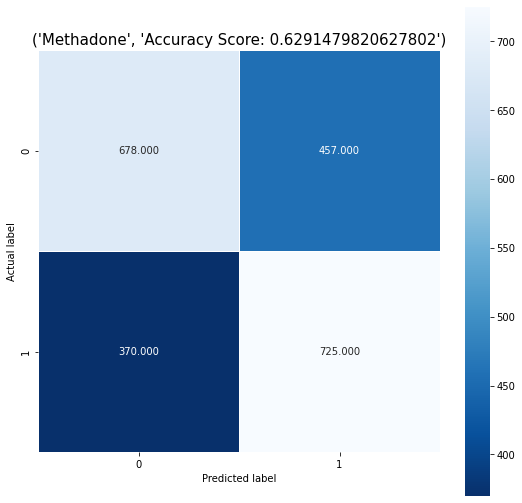

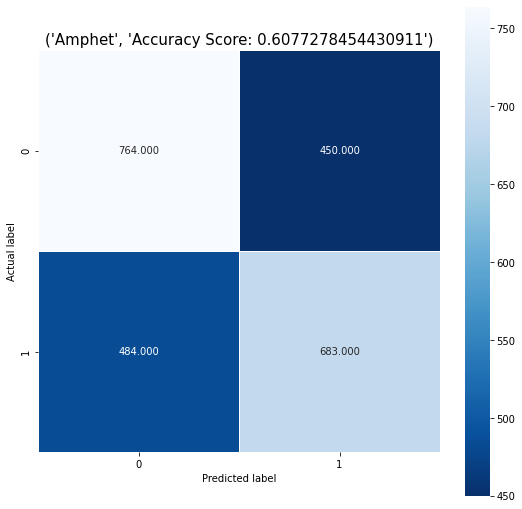

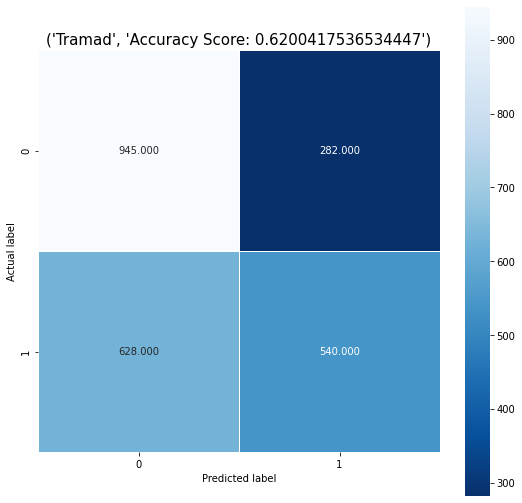

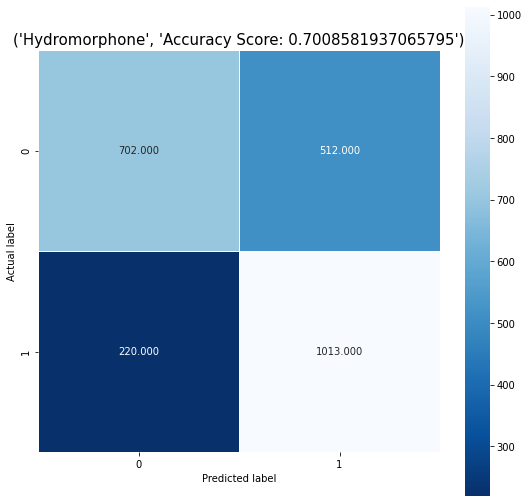

In [76]:
def DrugForest(DF):
    print("Random Forest")
    for i in drugs:
        print(i)
        xDrugDeaths = DF[["Gender_Female", "Gender_Male", "Gender_Unknown", "Race_Asian Indian", "Race_Asian, Other", 
                          "Race_Black", "Race_Chinese", "Race_Hawaiian", "Race_Hispanic, Black", "Race_Hispanic, White",
                          "Race_Native American, Other", "Race_Other", "Race_Unknown", "Race_White", "Residence_", 
                          "Residence_FAIRFIELD", "Residence_HARTFORD", "Residence_LITCHFIELD", "Residence_MIDDLESEX", 
                          "Residence_NEW HAVEN", "Residence_NEW LONDON", "Residence_OTHER", "Residence_TOLLAND" ,
                          "Residence_WINDHAM", "Death_FAIRFIELD" ,"Death_HARTFORD", "Death_LITCHFIELD", 
                          "Death_MIDDLESEX", "Death_NEW HAVEN", "Death_NEW LONDON", "Death_OTHER", "Death_TOLLAND", 
                          "Death_WINDHAM"]]
        yDrugDeaths = DF[i]
                         
        ros = RandomOverSampler(random_state=12345)
        xOverSample, yOverSample = ros.fit_resample(xDrugDeaths, yDrugDeaths)

        X_train, X_test, y_train, y_test = train_test_split(xOverSample, yOverSample)  
        
        rfc = RandomForestClassifier()
        rfc.fit(X_train, y_train)
        rfc_predicted = rfc.predict(X_test)
        rfc_expected = y_test
        rfc_matches = (rfc_predicted == rfc_expected)
        score = rfc.score(X_test, y_test)

        print("Overall Accuracy for RFC = ", rfc_matches.sum()/float(len(rfc_matches)))
        print(classification_report(y_test, rfc_predicted))
        
        features = ["Gender_Female", "Gender_Male", "Gender_Unknown", "Race_Asian Indian", "Race_Asian, Other", 
                          "Race_Black", "Race_Chinese", "Race_Hawaiian", "Race_Hispanic, Black", "Race_Hispanic, White",
                          "Race_Native American, Other", "Race_Other", "Race_Unknown", "Race_White", "Residence_", 
                          "Residence_FAIRFIELD", "Residence_HARTFORD", "Residence_LITCHFIELD", "Residence_MIDDLESEX", 
                          "Residence_NEW HAVEN", "Residence_NEW LONDON", "Residence_OTHER", "Residence_TOLLAND" ,
                          "Residence_WINDHAM", "Death_FAIRFIELD" ,"Death_HARTFORD", "Death_LITCHFIELD", 
                          "Death_MIDDLESEX", "Death_NEW HAVEN", "Death_NEW LONDON", "Death_OTHER", "Death_TOLLAND", 
                          "Death_WINDHAM"]
        featureImportance = rfc.feature_importances_
        for j in range(len(features)):
            print(features[j], featureImportance[j])

        cm = metrics.confusion_matrix(rfc_expected, rfc_predicted)
        plt.figure(figsize=(9,9))
        sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        all_sample_title = i,'Accuracy Score: {0}'.format(score)
        plt.title(all_sample_title, size = 15);
        
        print("-----------")
DrugForest(KaggleData)

In [77]:
#Data viewing
#Made for viewing the data to get screenshots for the presentation

In [78]:
KaggleData.head()

lumn1       ID            Date  DateType  Age     Sex          Race  \
0      1  13-0102  3/21/2013 0:00         0   48    Male         Black   
1      2  16-0165  3/13/2016 0:00         0   30  Female         White   
2      3  16-0208  3/31/2016 0:00         0   23    Male         White   
3      4  13-0052  2/13/2013 0:00         0   22    Male  Asian, Other   
4      5  14-0277  6/29/2014 0:00         0   23    Male         White   

  ResidenceCity ResidenceCounty ResidenceState  ... Residence_WINDHAM  \
0       NORWALK       FAIRFIELD                 ...                 0   
1    SANDY HOOK       FAIRFIELD             CT  ...                 0   
2           RYE     WESTCHESTER             NY  ...                 0   
3      FLUSHING          QUEENS                 ...                 0   
4       BRISTOL        HARTFORD                 ...                 0   

  Death_FAIRFIELD Death_HARTFORD Death_LITCHFIELD Death_MIDDLESEX  \
0               1              0                0               0   
1               1              0                0               0   
2               1              0                0               0   
3               1              0                0               0   
4               0              1                0               0   

  Death_NEW HAVEN  Death_NEW LONDON  Death_OTHER  Death_TOLLAND  Death_WINDHAM  
0               0                 0            0              0              0  
1               0                 0            0              0              0  
2               0                 0            0              0              0  
3               0                 0            0              0              0  
4               0                 0            0              0              0  

[5 rows x 71 columns]

In [79]:
Housing.head()

Town      County  2012  2013  2014  2015  2016  2017  2018
1      Andover     Tolland  1322  1326  1328  1332  1335  1338  1343
2      Ansonia   New Haven  8154  8157  8154  8154  8151  8155  8159
3      Ashford     Windham  1910  1911  1914  1915  1920  1923  1925
4         Avon    Hartford  7445  7480  7498  7525  7541  7554  7558
5  Barkhamsted  Litchfield  1592  1593  1599  1600  1600  1600  1601

In [80]:
DemographicDF.head()

County  Age Group  NonHispanicWhiteM  NonHispanicWhiteF  \
0  Fairfield     <1 yrs               2519               2379   
1  Fairfield    1-4 yrs              11212              10518   
2  Fairfield    5-9 yrs              16479              15562   
3  Fairfield  10-14 yrs              19726              18598   
4  Fairfield  15-19 yrs              21023              20164   

   NonHispanicBlackM  NonHispanicBlackF  NonHispanicAmerIndianM  \
0                737                709                       6   
1               2700               2669                      46   
2               3681               3657                      79   
3               3745               3872                      48   
4               4238               4155                      51   

   NonHispanicAmerIndianF  NonHispanicAsianPiM  NonHispanicAsianPiF  ...  \
0                       7                  363                  342  ...   
1                      46                 1427                 1489  ...   
2                      51                 1939                 1948  ...   
3                      57                 1883                 2020  ...   
4                      50                 1468                 1582  ...   

   HispanicWhiteF  HispanicBlackM  HispanicBlackF  HispanicAmerIndianM  \
0            1270             209             201                   33   
1            5273             701             695                   86   
2            6579             984             897                  163   
3            6165             856             859                  192   
4            5829             813             815                  169   

   HispanicAmerIndianF  HispanicAsianPiM  HispanicAsianPiF  HispanicTotal  \
0                   32                23                24           3115   
1                   96                71                48          12428   
2                  139               100                76          15865   
3                  151                86                69          14841   
4                  139                87                97          14534   

   Total  Year  
0  10177  2016  
1  42535  2016  
2  59261  2016  
3  64790  2016  
4  67265  2016  

[5 rows x 22 columns]

In [81]:
IncomeData.head()

Towns  Median household income Mean household income  \
0      Andover                      97426                109220   
1      Ansonia                      43144                 62191   
2      Ashford                      77250                 93192   
3         Avon                     116565                167001   
4  Barkhamsted                      81792                 96424   

   Per capita income  YEAR  
0              39872  2014  
1              24804  2014  
2              38310  2014  
3              66365  2014  
4              38593  2014

In [82]:
KaggleData.describe()

lumn1     DateType          Age       Heroin      Cocaine  \
count  4916.000000  4916.000000  4916.000000  4916.000000  4916.000000   
mean   2559.037632     0.445077    41.979862     0.495321     0.291294   
std    1473.434090     0.497025    12.366718     0.500029     0.454405   
min       1.000000     0.000000    14.000000     0.000000     0.000000   
25%    1285.750000     0.000000    32.000000     0.000000     0.000000   
50%    2560.500000     0.000000    42.000000     0.000000     0.000000   
75%    3835.250000     1.000000    52.000000     1.000000     1.000000   
max    5104.000000     1.000000    87.000000     1.000000     1.000000   

          Fentanyl  Fentanyl_Analogue    Oxycodone  Oxymorphone      Ethanol  \
count  4916.000000        4916.000000  4916.000000  4916.000000  4916.000000   
mean      0.433889           0.074858     0.121237     0.021359     0.241863   
std       0.495661           0.263188     0.326435     0.144592     0.428255   
min       0.000000           0.000000     0.000000     0.000000     0.000000   
25%       0.000000           0.000000     0.000000     0.000000     0.000000   
50%       0.000000           0.000000     0.000000     0.000000     0.000000   
75%       1.000000           0.000000     0.000000     0.000000     0.000000   
max       1.000000           1.000000     1.000000     1.000000     1.000000   

       ...  Residence_WINDHAM  Death_FAIRFIELD  Death_HARTFORD  \
count  ...        4916.000000      4916.000000     4916.000000   
mean   ...           0.034581         0.158666        0.307567   
std    ...           0.182735         0.365401        0.461533   
min    ...           0.000000         0.000000        0.000000   
25%    ...           0.000000         0.000000        0.000000   
50%    ...           0.000000         0.000000        0.000000   
75%    ...           0.000000         0.000000        1.000000   
max    ...           1.000000         1.000000        1.000000   

       Death_LITCHFIELD  Death_MIDDLESEX  Death_NEW HAVEN  Death_NEW LONDON  \
count       4916.000000      4916.000000      4916.000000       4916.000000   
mean           0.056143         0.043531         0.276241          0.092962   
std            0.230221         0.204071         0.447183          0.290408   
min            0.000000         0.000000         0.000000          0.000000   
25%            0.000000         0.000000         0.000000          0.000000   
50%            0.000000         0.000000         0.000000          0.000000   
75%            0.000000         0.000000         1.000000          0.000000   
max            1.000000         1.000000         1.000000          1.000000   

       Death_OTHER  Death_TOLLAND  Death_WINDHAM  
count  4916.000000    4916.000000    4916.000000  
mean      0.000407       0.028885       0.035598  
std       0.020168       0.167501       0.185305  
min       0.000000       0.000000       0.000000  
25%       0.000000       0.000000       0.000000  
50%       0.000000       0.000000       0.000000  
75%       0.000000       0.000000       0.000000  
max       1.000000       1.000000       1.000000  

[8 rows x 50 columns]

In [83]:
Housing.describe()

2012          2013          2014          2015          2016  \
count    169.000000    169.000000    169.000000    169.000000    169.000000   
mean    8838.047337   8861.875740   8886.071006   8914.751479   8940.360947   
std    10506.624740  10532.855222  10564.864250  10604.251329  10632.977794   
min      388.000000    388.000000    389.000000    390.000000    390.000000   
25%     2313.000000   2318.000000   2324.000000   2333.000000   2336.000000   
50%     5467.000000   5477.000000   5491.000000   5497.000000   5506.000000   
75%    10089.000000  10102.000000  10115.000000  10144.000000  10183.000000   
max    57240.000000  57215.000000  57335.000000  57324.000000  57319.000000   

               2017          2018  
count    169.000000    169.000000  
mean    8958.964497   8980.207101  
std    10636.211026  10649.739770  
min      392.000000    394.000000  
25%     2338.000000   2342.000000  
50%     5629.000000   5618.000000  
75%    10229.000000  10292.000000  
max    57315.000000  57265.000000

In [84]:
DemographicDF.describe()

NonHispanicWhiteM  NonHispanicWhiteF  NonHispanicBlackM  \
count        1064.000000        1064.000000        1064.000000   
mean         7947.671053        8369.452068        1189.025376   
std          6591.254422        6812.353626        1565.213333   
min           411.000000         388.000000           2.000000   
25%          3074.250000        3124.500000         108.000000   
50%          5333.500000        5437.000000         305.000000   
75%         13151.750000       13941.000000        2145.750000   
max         27098.000000       28022.000000        5384.000000   

       NonHispanicBlackF  NonHispanicAmerIndianM  NonHispanicAmerIndianF  \
count        1064.000000             1064.000000             1064.000000   
mean         1295.594925               30.598684               31.449248   
std          1668.551462               29.580568               29.056685   
min             4.000000                0.000000                0.000000   
25%            94.750000                9.000000                9.000000   
50%           313.000000               17.000000               18.000000   
75%          2670.250000               51.000000               55.000000   
max          5057.000000              169.000000              163.000000   

       NonHispanicAsianPiM  NonHispanicAsianPiF  NonHispanicTotal  \
count          1064.000000          1064.000000       1064.000000   
mean            533.355263           572.366541      19969.513158   
std             666.555677           707.816118      17432.916836   
min               1.000000             1.000000        864.000000   
25%              75.750000            90.000000       6929.750000   
50%             198.500000           209.000000      11934.500000   
75%             796.750000           836.000000      36391.000000   
max            3009.000000          2870.000000      65546.000000   

       HispanicWhiteM  HispanicWhiteF  HispanicBlackM  HispanicBlackF  \
count     1064.000000     1064.000000     1064.000000     1064.000000   
mean      1528.986842     1523.248120      212.107143      229.531015   
std       2103.575064     2018.177839      319.510588      334.388912   
min          6.000000        6.000000        0.000000        0.000000   
25%        177.000000      178.750000       17.000000       19.000000   
50%        404.500000      422.000000       51.000000       53.000000   
75%       1855.750000     2212.750000      237.750000      247.000000   
max       7020.000000     6924.000000     1379.000000     1287.000000   

       HispanicAmerIndianM  HispanicAmerIndianF  HispanicAsianPiM  \
count          1064.000000          1064.000000       1064.000000   
mean             44.121241            41.074248         28.394737   
std              60.253239            53.253129         39.122648   
min               0.000000             0.000000          0.000000   
25%               4.000000             4.000000          3.000000   
50%              13.000000            12.000000         10.000000   
75%              63.250000            58.250000         36.500000   
max             250.000000           202.000000        223.000000   

       HispanicAsianPiF  HispanicTotal         Total         Year  
count       1064.000000    1064.000000   1064.000000  1064.000000  
mean          23.860902    3631.324248  23600.837406  2015.000000  
std           31.279028    4910.808058  21705.176212     2.000941  
min            0.000000      13.000000   1067.000000  2012.000000  
25%            3.000000     444.000000   7761.750000  2013.000000  
50%            8.000000     957.000000  12416.500000  2015.000000  
75%           28.000000    4553.500000  43580.750000  2017.000000  
max          134.000000   16137.000000  75954.000000  2018.000000

In [85]:
IncomeData.describe()

Median household income  Per capita income         YEAR
count               676.000000         676.000000   676.000000
mean              84306.911243       41454.997041  2013.500000
std               26800.150004       13958.580744     1.118862
min               28931.000000       16448.000000  2012.000000
25%               68341.500000       33562.250000  2012.750000
50%               80867.000000       39193.500000  2013.500000
75%               95395.000000       45018.250000  2014.250000
max              217171.000000      105846.000000  2015.000000